### 1. **Problem Statement:**
##### - The dataset consists of data collected from heavy Scania trucks in everyday usage. The system in focus is the Air Pressure system (APS) which generates pressurized air that is utilized in various functions in a truck, such as braking and gear changes. The datasets' positive class consists of component failures for a specific component of the APS system. The negative class consists of trucks with failures for components not related to the APS. The data consists of a subset of all available data, selected by experts.

##### - The objective is to reduce the cost caused by unnecessary repairs (minimize the false predictors).

##### Cost 1 = 10 and Cost 2 = 500

##### - The total cost of a prediction model the sum of Cost_1 multiplied by the number of Instances with type 1 failure and Cost_2 with the number of instances with type 2 failure, resulting in a Total_cost. In this case Cost_1 refers to the cost that an unnessecary check needs to be done by an mechanic at an workshop, while Cost_2 refer to the cost of missing a faulty truck, which may cause a breakdown.

##### - Total_cost = Cost_1 * No_Instances + Cost_2 * No_Instances.

##### - From the above problem statement we could observe that, we have to reduce false positives and false negatives. More importantly we have to reduce false negatives, since cost incurred due to false negative is 50 times higher than the false positives.

### Challenges and other objectives:
##### - Need to Handle many Null values in almost all columns
##### - No low-latency requirement: low-latency requirement means that predictions need to be made quickly, often in real-time or near-real-time. In this case, since there is no such requirement, the focus can be on building accurate models even if the take longer to train or make predictions.
##### - Interpretability is not important: The primary objective is predictive accuracy rather than understanding the underlying factors driving the predictions. Models that are highly accurate but complex such as deep NN or ensemble methods may be preferred over simple, more interpretable models like LR or DT.
##### - misclassification leads the unecessary repair costs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 2. Reading the data

In [2]:
# df = pd.read_csv(r'https://raw.githubusercontent.com/avnyadav/sensor-fault-detection/main/aps_failure_training_set1.csv', na_values="na")
df_train = pd.read_csv('../data/aps_failure_training_set.csv', na_values="na")
df_test = pd.read_csv('../data/aps_failure_test_set.csv', na_values="na")

In [3]:
df_train

class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0       neg   76698     NaN  2.130706e+09   280.0     0.0     0.0     0.0   
1       neg   33058     NaN  0.000000e+00     NaN     0.0     0.0     0.0   
2       neg   41040     NaN  2.280000e+02   100.0     0.0     0.0     0.0   
3       neg      12     0.0  7.000000e+01    66.0     0.0    10.0     0.0   
4       neg   60874     NaN  1.368000e+03   458.0     0.0     0.0     0.0   
...     ...     ...     ...           ...     ...     ...     ...     ...   
59995   neg  153002     NaN  6.640000e+02   186.0     0.0     0.0     0.0   
59996   neg    2286     NaN  2.130707e+09   224.0     0.0     0.0     0.0   
59997   neg     112     0.0  2.130706e+09    18.0     0.0     0.0     0.0   
59998   neg   80292     NaN  2.130706e+09   494.0     0.0     0.0     0.0   
59999   neg   40222     NaN  6.980000e+02   628.0     0.0     0.0     0.0   

       ag_001  ag_002  ...     ee_002    ee_003     ee_004     ee_005  \
0         0.0     0.0  ...  1240520.0  493384.0   721044.0   469792.0   
1         0.0     0.0  ...   421400.0  178064.0   293306.0   245416.0   
2         0.0     0.0  ...   277378.0  159812.0   423992.0   409564.0   
3         0.0     0.0  ...      240.0      46.0       58.0       44.0   
4         0.0     0.0  ...   622012.0  229790.0   405298.0   347188.0   
...       ...     ...  ...        ...       ...        ...        ...   
59995     0.0     0.0  ...   998500.0  566884.0  1290398.0  1218244.0   
59996     0.0     0.0  ...    10578.0    6760.0    21126.0    68424.0   
59997     0.0     0.0  ...      792.0     386.0      452.0      144.0   
59998     0.0     0.0  ...   699352.0  222654.0   347378.0   225724.0   
59999     0.0     0.0  ...   440066.0  183200.0   344546.0   254068.0   

          ee_006    ee_007    ee_008    ee_009  ef_000  eg_000  
0       339156.0  157956.0   73224.0       0.0     0.0     0.0  
1       133654.0   81140.0   97576.0    1500.0     0.0     0.0  
2       320746.0  158022.0   95128.0     514.0     0.0     0.0  
3           10.0       0.0       0.0       0.0     4.0    32.0  
4       286954.0  311560.0  433954.0    1218.0     0.0     0.0  
...          ...       ...       ...       ...     ...     ...  
59995  1019768.0  717762.0  898642.0   28588.0     0.0     0.0  
59996      136.0       0.0       0.0       0.0     0.0     0.0  
59997      146.0    2622.0       0.0       0.0     0.0     0.0  
59998   194440.0  165070.0  802280.0  388422.0     0.0     0.0  
59999   225148.0  158304.0  170384.0     158.0     0.0     0.0  

[60000 rows x 171 columns]

In [4]:
df_test

class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0       neg      60     0.0  2.000000e+01    12.0     0.0     0.0     0.0   
1       neg      82     0.0  6.800000e+01    40.0     0.0     0.0     0.0   
2       neg   66002     2.0  2.120000e+02   112.0     0.0     0.0     0.0   
3       neg   59816     NaN  1.010000e+03   936.0     0.0     0.0     0.0   
4       neg    1814     NaN  1.560000e+02   140.0     0.0     0.0     0.0   
...     ...     ...     ...           ...     ...     ...     ...     ...   
15995   neg   81852     NaN  2.130706e+09   892.0     0.0     0.0     0.0   
15996   neg      18     0.0  5.200000e+01    46.0     8.0    26.0     0.0   
15997   neg   79636     NaN  1.670000e+03  1518.0     0.0     0.0     0.0   
15998   neg     110     NaN  3.600000e+01    32.0     0.0     0.0     0.0   
15999   neg       8     0.0  6.000000e+00     4.0     2.0     2.0     0.0   

       ag_001  ag_002  ...    ee_002    ee_003    ee_004    ee_005     ee_006  \
0         0.0     0.0  ...    1098.0     138.0     412.0     654.0       78.0   
1         0.0     0.0  ...    1068.0     276.0    1620.0     116.0       86.0   
2         0.0     0.0  ...  495076.0  380368.0  440134.0  269556.0  1315022.0   
3         0.0     0.0  ...  540820.0  243270.0  483302.0  485332.0   431376.0   
4         0.0     0.0  ...    7646.0    4144.0   18466.0   49782.0     3176.0   
...       ...     ...  ...       ...       ...       ...       ...        ...   
15995     0.0     0.0  ...  632658.0  273242.0  510354.0  373918.0   349840.0   
15996     0.0     0.0  ...     266.0      44.0      46.0      14.0        2.0   
15997     0.0     0.0  ...  806832.0  449962.0  778826.0  581558.0   375498.0   
15998     0.0     0.0  ...     588.0     210.0     180.0     544.0     1004.0   
15999     0.0     0.0  ...      46.0      10.0      48.0      14.0       42.0   

         ee_007    ee_008   ee_009  ef_000  eg_000  
0          88.0       0.0      0.0     0.0     0.0  
1         462.0       0.0      0.0     0.0     0.0  
2      153680.0     516.0      0.0     0.0     0.0  
3      210074.0  281662.0   3232.0     0.0     0.0  
4         482.0      76.0      0.0     0.0     0.0  
...         ...       ...      ...     ...     ...  
15995  317840.0  960024.0  25566.0     0.0     0.0  
15996       0.0       0.0      0.0     0.0     0.0  
15997  222866.0  358934.0  19548.0     0.0     0.0  
15998    1338.0      74.0      0.0     0.0     0.0  
15999      46.0       0.0      0.0     0.0     0.0  

[16000 rows x 171 columns]

In [5]:
print(f"""The training dataset has shape: {df_train.shape}
and the testing dataset has shape: {df_test.shape}""")

The training dataset has shape: (60000, 171)
and the testing dataset has shape: (16000, 171)


In [6]:
# Check the unique values of the target variable
df_train['class'].value_counts()

class
neg    59000
pos     1000
Name: count, dtype: int64

In [7]:
df_test['class'].value_counts()

class
neg    15625
pos      375
Name: count, dtype: int64

#### 3. Identifying the target variable

In [8]:
# Define numeric and categorical columns
# It is 'O' not '0'
numeric_features = [feature for feature in df_train.columns if df_train[feature].dtype != 'O']
categorical_features = [feature for feature in df_train.columns if df_train[feature].dtype == 'O']

# Print columns
print(f"We have {len(numeric_features)} numerical features: {numeric_features}")
print(f"We have {len(categorical_features)} categorical features: {categorical_features}")

We have 170 numerical features: ['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000',

#### Because this is sensor data, interpretation of data is not required

#### 4. Checking and visualizing missing values

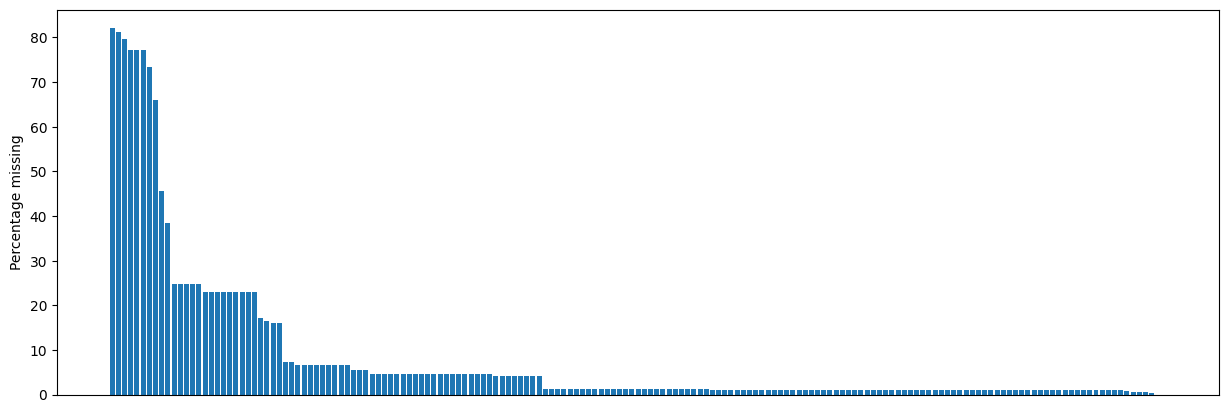

In [9]:
# Plotting missing values count for each column
fig, ax = plt.subplots(figsize=(15, 5))

missing = df_train.isna().sum().div(df_train.shape[0]).mul(100).to_frame().sort_values(by=0, ascending=False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

#### 5. Dropping columns which have more than 70% missing values

In [10]:
dropcols = missing[missing[0]>70]
dropcols

0
br_000  82.106667
bq_000  81.203333
bp_000  79.566667
bo_000  77.221667
ab_000  77.215000
cr_000  77.215000
bn_000  73.348333

In [11]:
df_train.drop(list(dropcols.index), axis=1, inplace=True)
df_test.drop(list(dropcols.index), axis=1, inplace=True)

In [12]:
print(f"""The training dataset has shape: {df_train.shape}
and the testing dataset has shape: {df_test.shape}""")

The training dataset has shape: (60000, 164)
and the testing dataset has shape: (16000, 164)


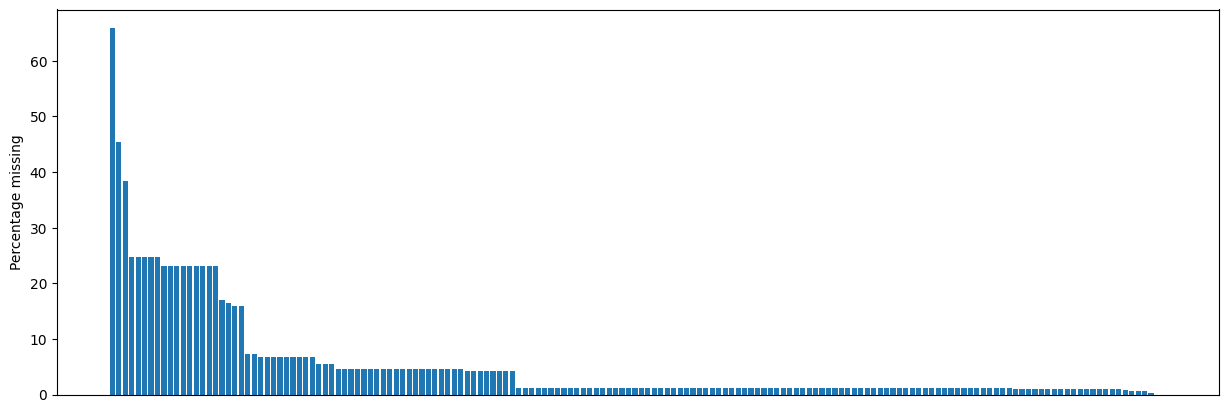

In [13]:
# Plotting missing values count for each column
fig, ax = plt.subplots(figsize=(15, 5))

missing = df_train.isna().sum().div(df_train.shape[0]).mul(100).to_frame().sort_values(by=0, ascending=False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

In [14]:
missing_values_count = df_train.isnull().sum()
total_cells = np.prod(df_train.shape)
total_missing = missing_values_count.sum()

# Percentage of data that is missing
print(f"Percentage of total missing cells in the data {(total_missing/total_cells)*100}%")

Percentage of total missing cells in the data 5.29765243902439%


#### 6. Visualization of unique values in target variable

Positive: 1000, Negative: 59000


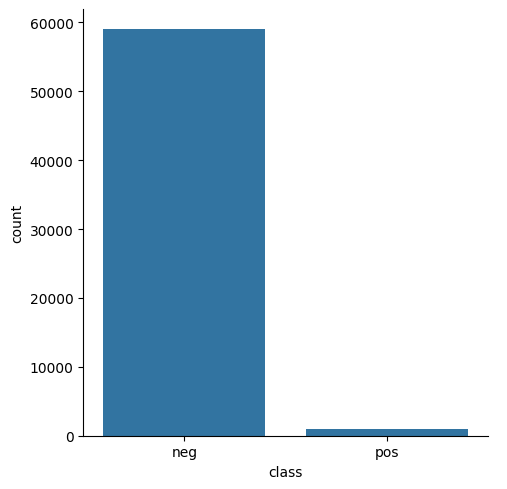

In [15]:
pos = df_train[df_train['class'] == 'pos'].shape[0]
neg = df_train[df_train['class'] == 'neg'].shape[0]

print("Positive: " + str(pos) + ", Negative: " + str(neg))
sns.catplot(data=df_train, x='class', kind='count')
plt.show()

##### **Report:**
##### - The target classes are highly imbalanced
##### - Class imbalance is a scenario that arises when we have unequal distribution of class in a dataset i.e. the number of data points in the negative class (majority) is very large compared to the positive class (minority).
##### - If the imbalanced data is not treated beforehand, then this will degrade the performance of the classifier model, hence we should handle the imbalanced data using certain methods.

##### **How to handle imbalanced data?**
##### - Resampling data is one of the most commonly preferred approaches to deal with an imbalanced dataset. There are broadly two types of methods for this: i) Undersampling ii) Oversampling. In most cases, oversampling is preferred over undersampling because, in undersampling, we remove instances from the data that may be carrying some important information.
##### - SMOTE: Synthetic Minority Oversampling Technique is an oversampling technique where the synthetic samples are generated for the minority class.
##### - Hybridization techniques involve combining both undersampling and oversampling to optimize the performance of classifier models for the samples created as part of these techniques.
##### - It only duplicates the data and it wont add new information, hence we look at different techniques.

#### 7. Creating helper functions for model training and eval

In [19]:
from sklearn.metrics import (accuracy_score, 
                             precision_score, 
                             recall_score, f1_score, 
                             roc_auc_score, 
                             confusion_matrix,
                             classification_report,
                             matthews_corrcoef)
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import RobustScaler
from catboost import CatBoostClassifier

In [20]:
def total_cost(y_true, y_pred):
    """
    This function takes in y_true and y_pred and prints the total cost due to misclassification as per data description
    """
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10*fp + 500*fn
    
    return cost

In [21]:
def evaluate_models_detailed(X_train, X_test, y_train, y_test, models):
    """
    Evaluates models with detailed text reports and returns a DataFrame 
    including Precision, Recall, and MCC.
    """
    report_list = []
    
    for model_name, model in models.items():
        print(f"{'='*20} {model_name} {'='*20}")
        
        # 1. Fit
        model.fit(X_train, y_train)
        
        # 2. Predict
        y_pred = model.predict(X_test)
        
        # 3. Calculate Cost
        test_cost = total_cost(y_test, y_pred)
        
        # 4. Generate Confusion Matrix Heatmap
        cm = confusion_matrix(y_test, y_pred)
        
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=['Predicted 0', 'Predicted 1'],
                    yticklabels=['Actual 0', 'Actual 1'])
        plt.title(f"Confusion Matrix: {model_name}\nCost: ${test_cost}")
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show() # Renders the plot immediately
        
        # 5. Print Classification Report
        print(f"\n--- Classification Report ({model_name}) ---")
        print(classification_report(y_test, y_pred))
        
        # 6. Gather Metrics
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]
            roc = roc_auc_score(y_test, y_prob)
        else:
            roc = roc_auc_score(y_test, y_pred)

        report_list.append({
            'Model': model_name,
            'Cost': test_cost,
            'Accuracy': accuracy_score(y_test, y_pred),
            'F1 Score': f1_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, zero_division=0),
            'Recall': recall_score(y_test, y_pred),
            'MCC': matthews_corrcoef(y_test, y_pred),
            'ROC AUC': roc
        })

    # Return DataFrame sorted by Cost (Ascending)
    return pd.DataFrame(report_list).sort_values(by='Cost')

#### 7. Plotting the distribution of all independent numerical variables

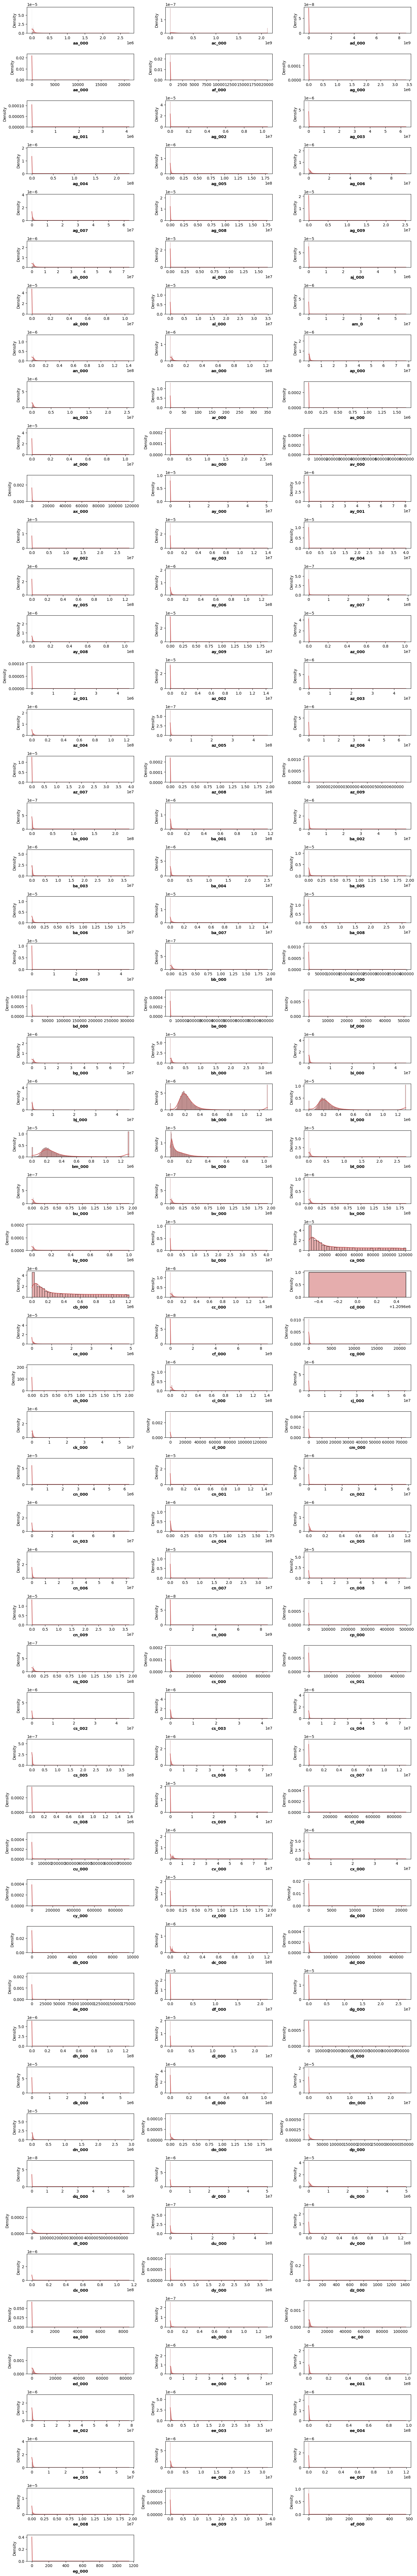

In [63]:
numeric_features = [feature for feature in df_train.columns if df_train[feature].dtype != 'O']

plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.histplot(x=df_train[col], color='indianred', kde=True, stat='density')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

##### **Report:**
##### - As per the above plot, most of the features are not normally distributed.
##### - Transformation of data is not of prime importance since it is a classification problem.
##### - Interpreting each and every column is not necessary as this is sensor data.

#### 8. Evaluating models on different experiments

In [22]:
# Splitting X and y for all experiments
X_train = df_train.drop('class', axis=1)
y_train = df_train['class']

X_test = df_test.drop('class', axis=1)
y_test = df_test['class']

In [23]:
# Manually encoding target variable
y_train = y_train.replace({'pos': 1, 'neg': 0})
y_test = y_test.replace({'pos': 1, 'neg': 0})

C:\Users\Acer\AppData\Local\Temp\ipykernel_22300\650242695.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace({'pos': 1, 'neg': 0})
C:\Users\Acer\AppData\Local\Temp\ipykernel_22300\650242695.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace({'pos': 1, 'neg': 0})


In [24]:
models = {
    "RandomForestClassifier": RandomForestClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "LGBMClassifier": LGBMClassifier(),
    "LogisticRegression": LogisticRegression(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(),
    "CatBoostClassifier": CatBoostClassifier(verbose=False),
    "AdaBoostClassifier": AdaBoostClassifier()
}

##### Exp 1: Baseline test using Simple imputer with median

##### Why is Robust scaler used over Standard scaler and minmax scaler?
##### We cannot use standard scaler as most of the independent variables are not normally distributed.
##### We cannot use minmax scaler as most of the features hae outliers.
##### We use robust scaler because it scales the data according to the quantile range. The IQR is the range between the 1st and 3rd quartile.

In [25]:
median_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('Scaler', RobustScaler())
])

X_train_median = median_pipeline.fit_transform(X_train)
X_test_median = median_pipeline.transform(X_test)

==================== RandomForestClassifier ====================


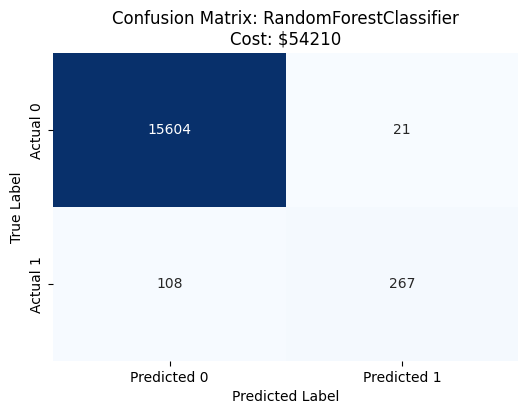


--- Classification Report (RandomForestClassifier) ---
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15625
           1       0.93      0.71      0.81       375

    accuracy                           0.99     16000
   macro avg       0.96      0.86      0.90     16000
weighted avg       0.99      0.99      0.99     16000

==================== DecisionTreeClassifier ====================


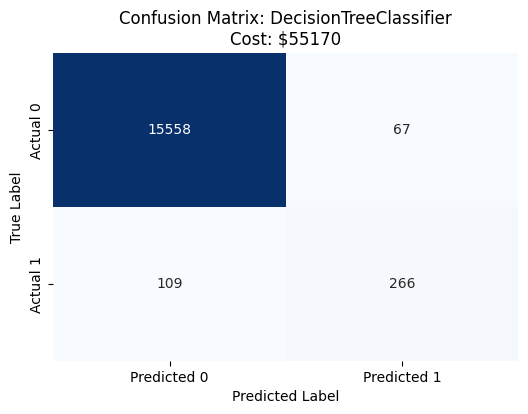


--- Classification Report (DecisionTreeClassifier) ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15625
           1       0.80      0.71      0.75       375

    accuracy                           0.99     16000
   macro avg       0.90      0.85      0.87     16000
weighted avg       0.99      0.99      0.99     16000

==================== GradientBoostingClassifier ====================


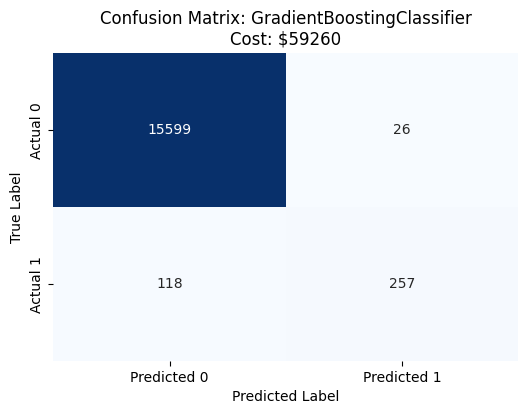


--- Classification Report (GradientBoostingClassifier) ---
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15625
           1       0.91      0.69      0.78       375

    accuracy                           0.99     16000
   macro avg       0.95      0.84      0.89     16000
weighted avg       0.99      0.99      0.99     16000

==================== LGBMClassifier ====================
[LightGBM] [Info] Number of positive: 1000, number of negative: 59000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031722 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37768
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 161
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016667 -> initscore=-4.077537
[LightGBM] [Info] Start training from score -4.077537


c:\CS\kish naik\APS_sensor_fault_detection\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


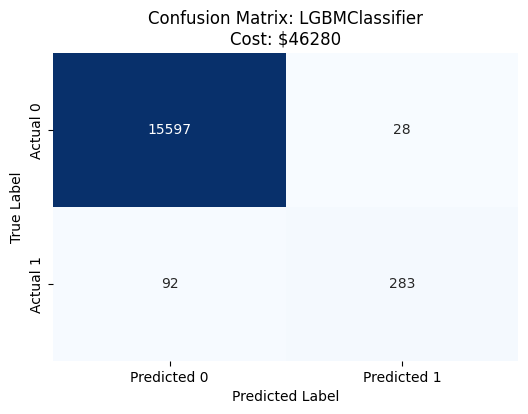

c:\CS\kish naik\APS_sensor_fault_detection\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



--- Classification Report (LGBMClassifier) ---
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15625
           1       0.91      0.75      0.83       375

    accuracy                           0.99     16000
   macro avg       0.95      0.88      0.91     16000
weighted avg       0.99      0.99      0.99     16000

==================== LogisticRegression ====================


c:\CS\kish naik\APS_sensor_fault_detection\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


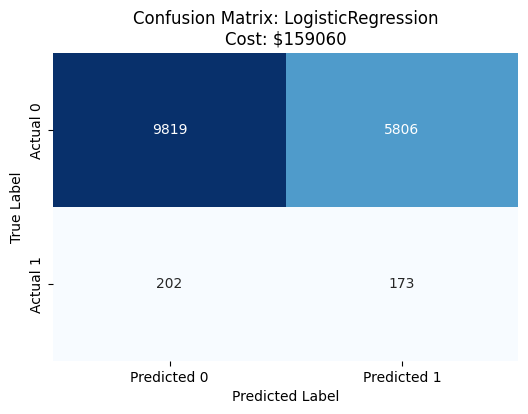


--- Classification Report (LogisticRegression) ---
              precision    recall  f1-score   support

           0       0.98      0.63      0.77     15625
           1       0.03      0.46      0.05       375

    accuracy                           0.62     16000
   macro avg       0.50      0.54      0.41     16000
weighted avg       0.96      0.62      0.75     16000

==================== KNeighborsClassifier ====================


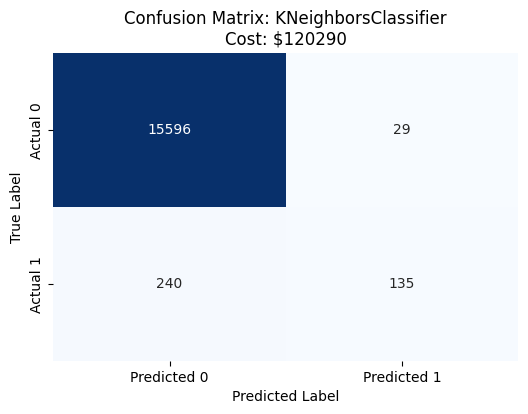


--- Classification Report (KNeighborsClassifier) ---
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     15625
           1       0.82      0.36      0.50       375

    accuracy                           0.98     16000
   macro avg       0.90      0.68      0.75     16000
weighted avg       0.98      0.98      0.98     16000

==================== XGBClassifier ====================


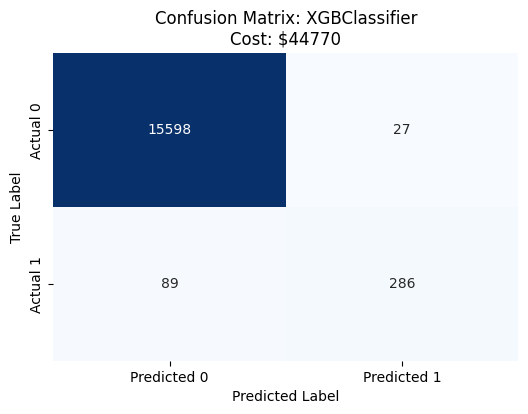


--- Classification Report (XGBClassifier) ---
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15625
           1       0.91      0.76      0.83       375

    accuracy                           0.99     16000
   macro avg       0.95      0.88      0.91     16000
weighted avg       0.99      0.99      0.99     16000

==================== CatBoostClassifier ====================


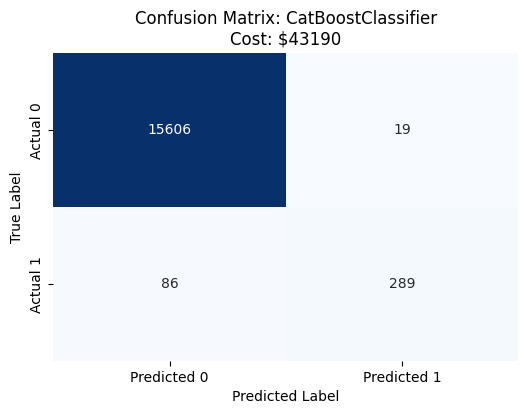


--- Classification Report (CatBoostClassifier) ---
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15625
           1       0.94      0.77      0.85       375

    accuracy                           0.99     16000
   macro avg       0.97      0.88      0.92     16000
weighted avg       0.99      0.99      0.99     16000

==================== AdaBoostClassifier ====================


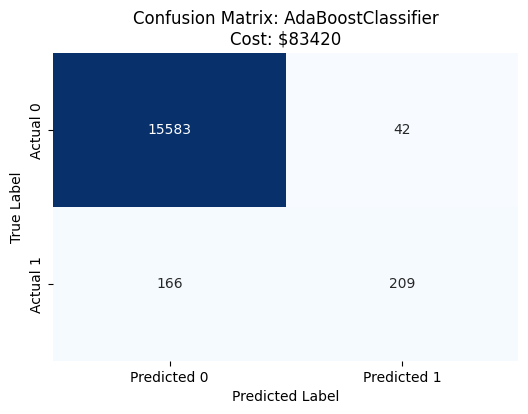


--- Classification Report (AdaBoostClassifier) ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15625
           1       0.83      0.56      0.67       375

    accuracy                           0.99     16000
   macro avg       0.91      0.78      0.83     16000
weighted avg       0.99      0.99      0.99     16000



In [26]:
report_median = evaluate_models_detailed(X_train_median, X_test_median, y_train, y_test, models)

In [27]:
report_median

Model    Cost  Accuracy  F1 Score  Precision  \
7          CatBoostClassifier   43190  0.993437  0.846266   0.938312   
6               XGBClassifier   44770  0.992750  0.831395   0.913738   
3              LGBMClassifier   46280  0.992500  0.825073   0.909968   
0      RandomForestClassifier   54210  0.991938  0.805430   0.927083   
1      DecisionTreeClassifier   55170  0.989000  0.751412   0.798799   
2  GradientBoostingClassifier   59260  0.991000  0.781155   0.908127   
8          AdaBoostClassifier   83420  0.987000  0.667732   0.832669   
5        KNeighborsClassifier  120290  0.983187  0.500928   0.823171   
4          LogisticRegression  159060  0.624500  0.054454   0.028935   

     Recall       MCC   ROC AUC  
7  0.770667  0.847212  0.996891  
6  0.762667  0.831253  0.994638  
3  0.754667  0.825031  0.994762  
0  0.712000  0.808673  0.990022  
1  0.709333  0.747184  0.852523  
2  0.685333  0.784682  0.994421  
8  0.557333  0.675270  0.990462  
5  0.360000  0.537946  0.847625  
4  0.461333  0.028066  0.582060

In [28]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42, sampling_strategy='minority', n_jobs=-1)
X_train_smt, y_train_smt = smt.fit_resample(X_train_median, y_train)

In [29]:
from imblearn.combine import SMOTEENN

smte = SMOTEENN(random_state=42, sampling_strategy='minority', n_jobs=-1)
X_train_smte, y_train_smte = smte.fit_resample(X_train_median, y_train)

==================== RandomForestClassifier ====================


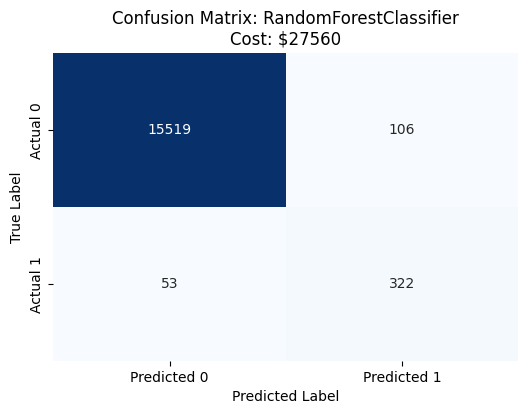


--- Classification Report (RandomForestClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15625
           1       0.75      0.86      0.80       375

    accuracy                           0.99     16000
   macro avg       0.87      0.93      0.90     16000
weighted avg       0.99      0.99      0.99     16000

==================== DecisionTreeClassifier ====================


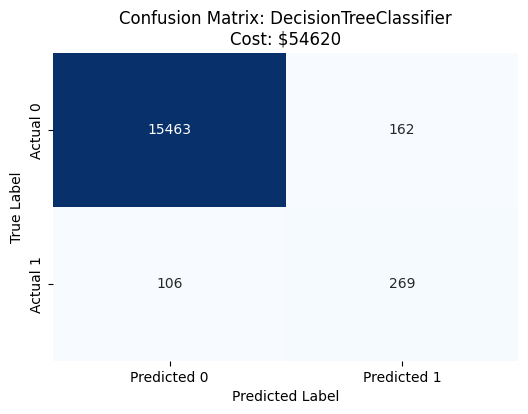


--- Classification Report (DecisionTreeClassifier) ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15625
           1       0.62      0.72      0.67       375

    accuracy                           0.98     16000
   macro avg       0.81      0.85      0.83     16000
weighted avg       0.98      0.98      0.98     16000

==================== GradientBoostingClassifier ====================


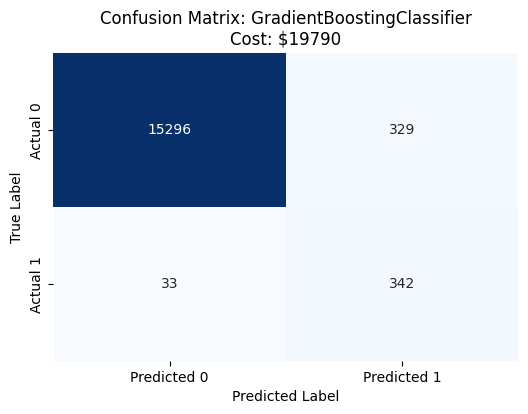


--- Classification Report (GradientBoostingClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     15625
           1       0.51      0.91      0.65       375

    accuracy                           0.98     16000
   macro avg       0.75      0.95      0.82     16000
weighted avg       0.99      0.98      0.98     16000

==================== LGBMClassifier ====================
[LightGBM] [Info] Number of positive: 58851, number of negative: 58851
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065579 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 40514
[LightGBM] [Info] Number of data points in the train set: 117702, number of used features: 162
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\CS\kish naik\APS_sensor_fault_detection\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


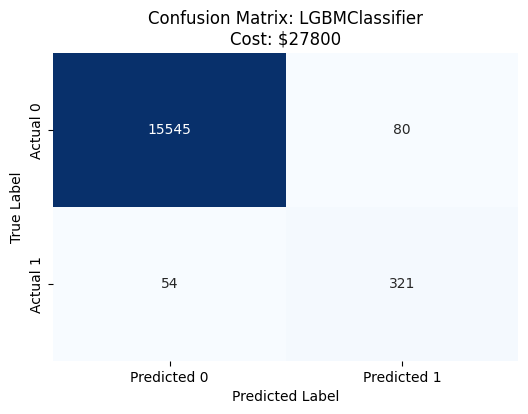

c:\CS\kish naik\APS_sensor_fault_detection\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



--- Classification Report (LGBMClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15625
           1       0.80      0.86      0.83       375

    accuracy                           0.99     16000
   macro avg       0.90      0.93      0.91     16000
weighted avg       0.99      0.99      0.99     16000

==================== LogisticRegression ====================


c:\CS\kish naik\APS_sensor_fault_detection\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


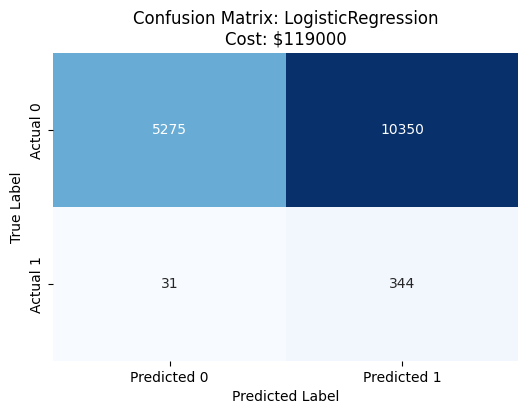


--- Classification Report (LogisticRegression) ---
              precision    recall  f1-score   support

           0       0.99      0.34      0.50     15625
           1       0.03      0.92      0.06       375

    accuracy                           0.35     16000
   macro avg       0.51      0.63      0.28     16000
weighted avg       0.97      0.35      0.49     16000

==================== KNeighborsClassifier ====================


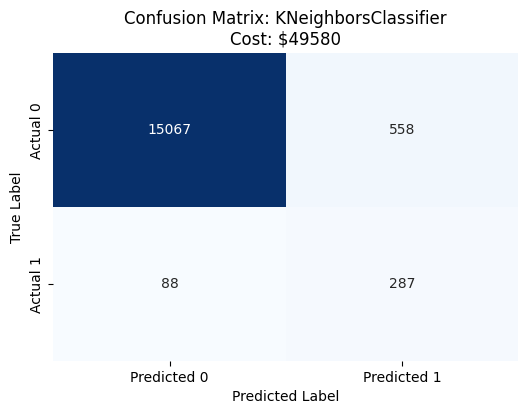


--- Classification Report (KNeighborsClassifier) ---
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     15625
           1       0.34      0.77      0.47       375

    accuracy                           0.96     16000
   macro avg       0.67      0.86      0.72     16000
weighted avg       0.98      0.96      0.97     16000

==================== XGBClassifier ====================


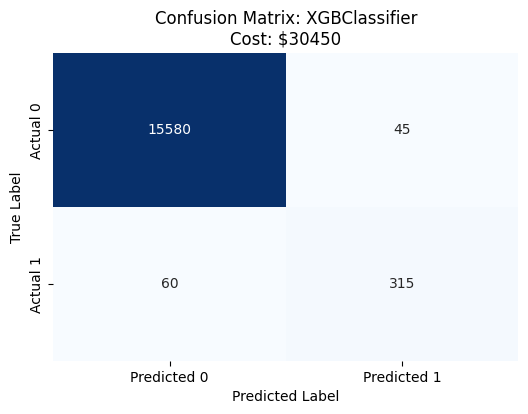


--- Classification Report (XGBClassifier) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15625
           1       0.88      0.84      0.86       375

    accuracy                           0.99     16000
   macro avg       0.94      0.92      0.93     16000
weighted avg       0.99      0.99      0.99     16000

==================== CatBoostClassifier ====================


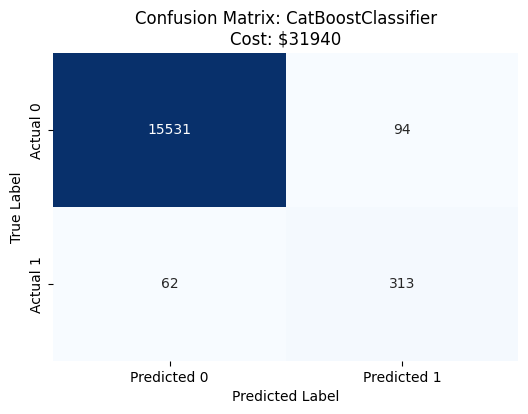


--- Classification Report (CatBoostClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15625
           1       0.77      0.83      0.80       375

    accuracy                           0.99     16000
   macro avg       0.88      0.91      0.90     16000
weighted avg       0.99      0.99      0.99     16000

==================== AdaBoostClassifier ====================


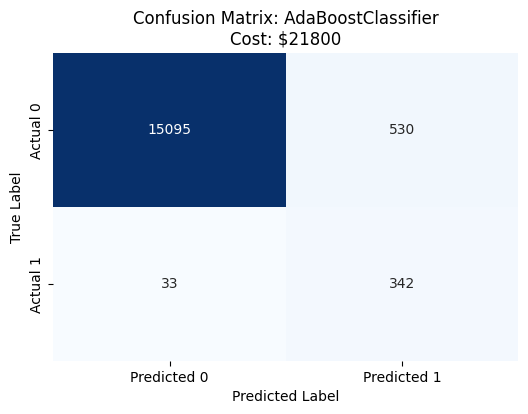


--- Classification Report (AdaBoostClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     15625
           1       0.39      0.91      0.55       375

    accuracy                           0.96     16000
   macro avg       0.70      0.94      0.77     16000
weighted avg       0.98      0.96      0.97     16000



In [30]:
report_median_smt = evaluate_models_detailed(X_train_smt, X_test_median, y_train_smt, y_test, models)

In [31]:
report_median_smt

Model    Cost  Accuracy  F1 Score  Precision  \
2  GradientBoostingClassifier   19790  0.977375  0.653920   0.509687   
8          AdaBoostClassifier   21800  0.964812  0.548516   0.392202   
0      RandomForestClassifier   27560  0.990062  0.801993   0.752336   
3              LGBMClassifier   27800  0.991625  0.827320   0.800499   
6               XGBClassifier   30450  0.993437  0.857143   0.875000   
7          CatBoostClassifier   31940  0.990250  0.800512   0.769042   
5        KNeighborsClassifier   49580  0.959625  0.470492   0.339645   
1      DecisionTreeClassifier   54620  0.983250  0.667494   0.624130   
4          LogisticRegression  119000  0.351187  0.062156   0.032168   

     Recall       MCC   ROC AUC  
2  0.912000  0.672447  0.991831  
8  0.912000  0.585209  0.989161  
0  0.858667  0.798751  0.993004  
3  0.856000  0.823519  0.995102  
6  0.840000  0.853972  0.994348  
7  0.834667  0.796224  0.994743  
5  0.765333  0.493534  0.909440  
1  0.717333  0.660625  0.853483  
4  0.917333  0.081922  0.908678

==================== RandomForestClassifier ====================


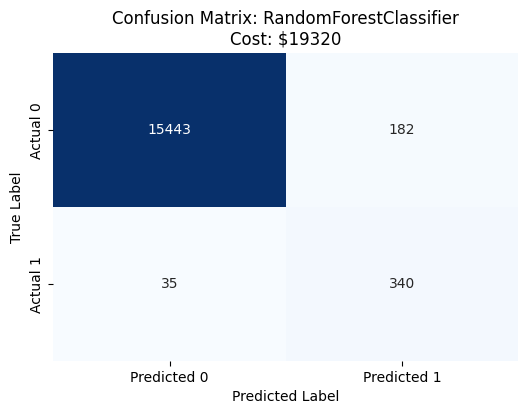


--- Classification Report (RandomForestClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15625
           1       0.65      0.91      0.76       375

    accuracy                           0.99     16000
   macro avg       0.82      0.95      0.88     16000
weighted avg       0.99      0.99      0.99     16000

==================== DecisionTreeClassifier ====================


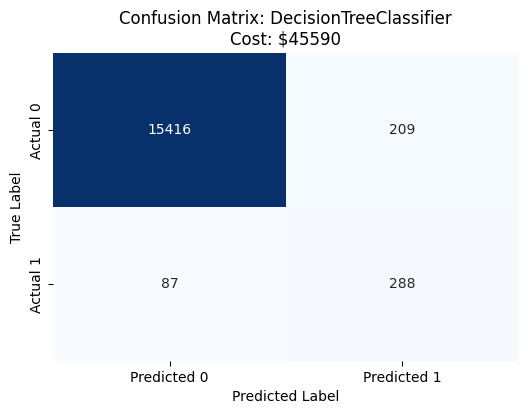


--- Classification Report (DecisionTreeClassifier) ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15625
           1       0.58      0.77      0.66       375

    accuracy                           0.98     16000
   macro avg       0.79      0.88      0.83     16000
weighted avg       0.98      0.98      0.98     16000

==================== GradientBoostingClassifier ====================


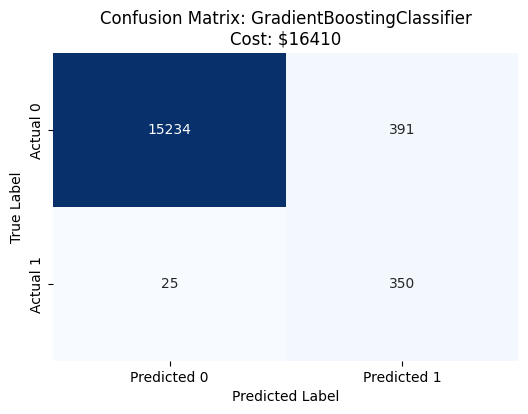


--- Classification Report (GradientBoostingClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     15625
           1       0.47      0.93      0.63       375

    accuracy                           0.97     16000
   macro avg       0.74      0.95      0.81     16000
weighted avg       0.99      0.97      0.98     16000

==================== LGBMClassifier ====================
[LightGBM] [Info] Number of positive: 57680, number of negative: 56022
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.054846 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 40503
[LightGBM] [Info] Number of data points in the train set: 113702, number of used features: 162
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507291 -> initscore=0.029166
[LightGBM] [Info] Start training from score 0.029166


c:\CS\kish naik\APS_sensor_fault_detection\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


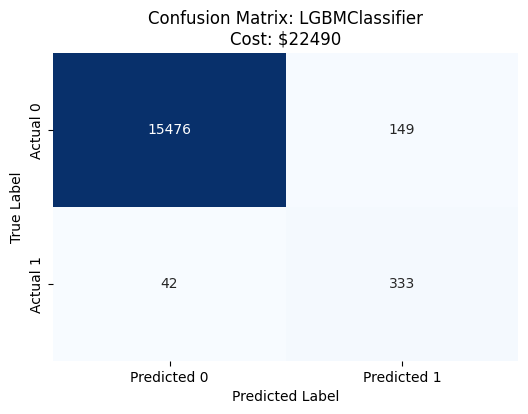

c:\CS\kish naik\APS_sensor_fault_detection\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



--- Classification Report (LGBMClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15625
           1       0.69      0.89      0.78       375

    accuracy                           0.99     16000
   macro avg       0.84      0.94      0.89     16000
weighted avg       0.99      0.99      0.99     16000

==================== LogisticRegression ====================


c:\CS\kish naik\APS_sensor_fault_detection\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


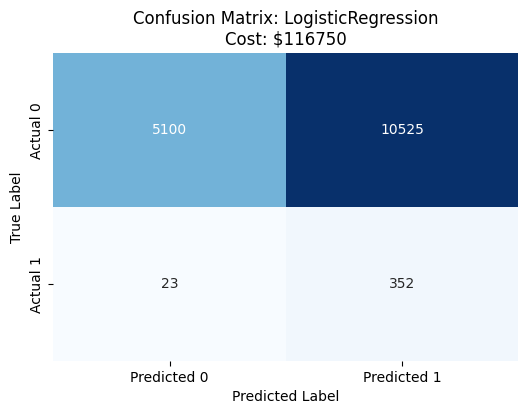


--- Classification Report (LogisticRegression) ---
              precision    recall  f1-score   support

           0       1.00      0.33      0.49     15625
           1       0.03      0.94      0.06       375

    accuracy                           0.34     16000
   macro avg       0.51      0.63      0.28     16000
weighted avg       0.97      0.34      0.48     16000

==================== KNeighborsClassifier ====================


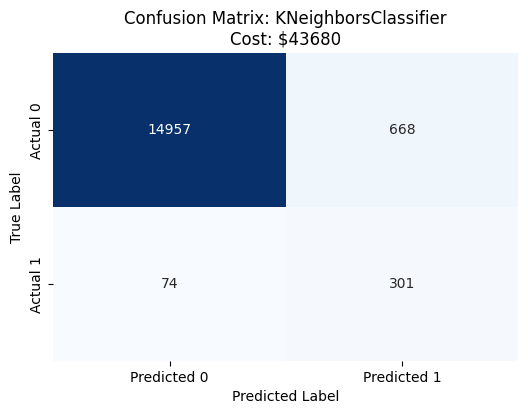


--- Classification Report (KNeighborsClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15625
           1       0.31      0.80      0.45       375

    accuracy                           0.95     16000
   macro avg       0.65      0.88      0.71     16000
weighted avg       0.98      0.95      0.96     16000

==================== XGBClassifier ====================


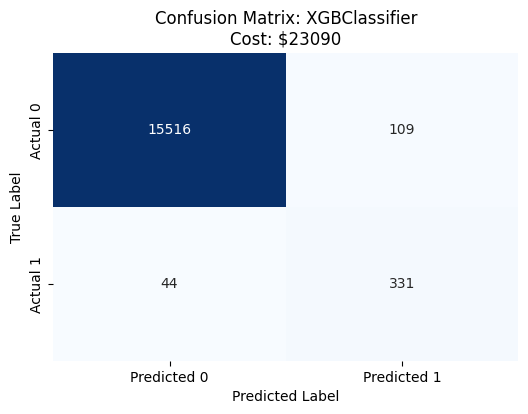


--- Classification Report (XGBClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15625
           1       0.75      0.88      0.81       375

    accuracy                           0.99     16000
   macro avg       0.87      0.94      0.90     16000
weighted avg       0.99      0.99      0.99     16000

==================== CatBoostClassifier ====================


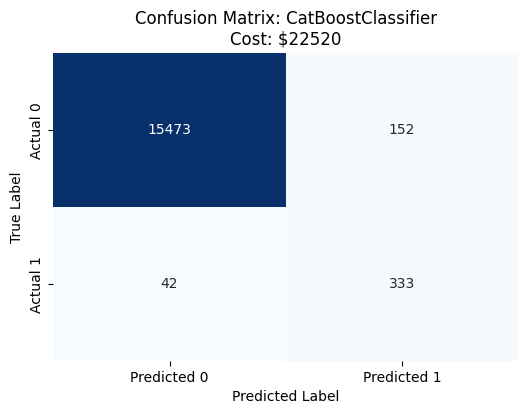


--- Classification Report (CatBoostClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15625
           1       0.69      0.89      0.77       375

    accuracy                           0.99     16000
   macro avg       0.84      0.94      0.88     16000
weighted avg       0.99      0.99      0.99     16000

==================== AdaBoostClassifier ====================


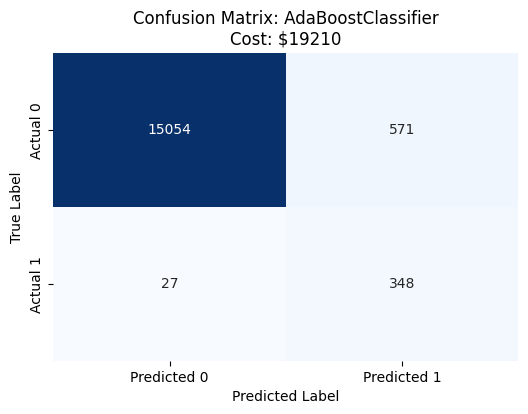


--- Classification Report (AdaBoostClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15625
           1       0.38      0.93      0.54       375

    accuracy                           0.96     16000
   macro avg       0.69      0.95      0.76     16000
weighted avg       0.98      0.96      0.97     16000



In [32]:
report_median_smte = evaluate_models_detailed(X_train_smte, X_test_median, y_train_smte, y_test, models)

In [33]:
report_median_smte

Model    Cost  Accuracy  F1 Score  Precision  \
2  GradientBoostingClassifier   16410  0.974000  0.627240   0.472335   
8          AdaBoostClassifier   19210  0.962625  0.537867   0.378672   
0      RandomForestClassifier   19320  0.986437  0.758082   0.651341   
3              LGBMClassifier   22490  0.988062  0.777130   0.690871   
7          CatBoostClassifier   22520  0.987875  0.774419   0.686598   
6               XGBClassifier   23090  0.990437  0.812270   0.752273   
5        KNeighborsClassifier   43680  0.953625  0.447917   0.310630   
1      DecisionTreeClassifier   45590  0.981500  0.660550   0.579477   
4          LogisticRegression  116750  0.340750  0.062567   0.032362   

     Recall       MCC   ROC AUC  
2  0.933333  0.653864  0.987016  
8  0.928000  0.579633  0.989821  
0  0.906667  0.762193  0.993580  
3  0.888000  0.777514  0.995210  
7  0.888000  0.775011  0.995084  
6  0.882667  0.810112  0.995232  
5  0.802667  0.481986  0.910576  
1  0.768000  0.658067  0.877312  
4  0.938667  0.085954  0.924025

#### Exp 2: Simple imputer with mean

In [34]:
mean_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('Scaler', RobustScaler())
])

X_train_mean = mean_pipeline.fit_transform(X_train)
X_test_mean = mean_pipeline.transform(X_test)

==================== RandomForestClassifier ====================


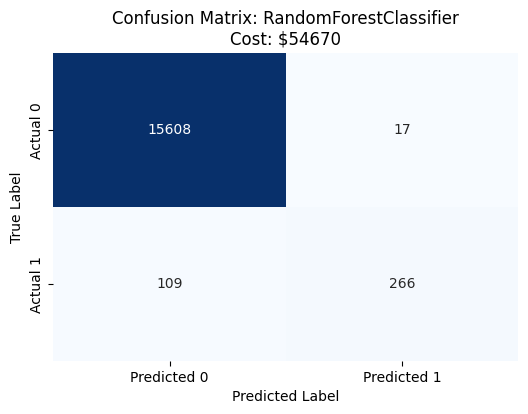


--- Classification Report (RandomForestClassifier) ---
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15625
           1       0.94      0.71      0.81       375

    accuracy                           0.99     16000
   macro avg       0.97      0.85      0.90     16000
weighted avg       0.99      0.99      0.99     16000

==================== DecisionTreeClassifier ====================


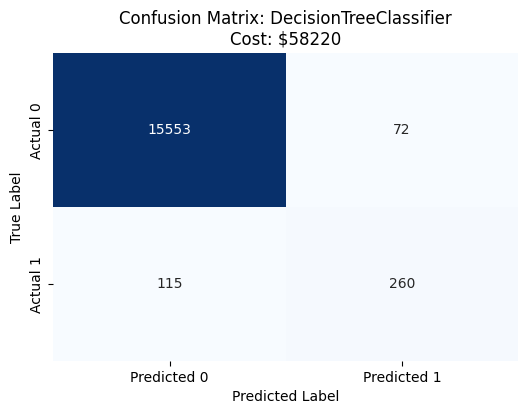


--- Classification Report (DecisionTreeClassifier) ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15625
           1       0.78      0.69      0.74       375

    accuracy                           0.99     16000
   macro avg       0.89      0.84      0.86     16000
weighted avg       0.99      0.99      0.99     16000

==================== GradientBoostingClassifier ====================


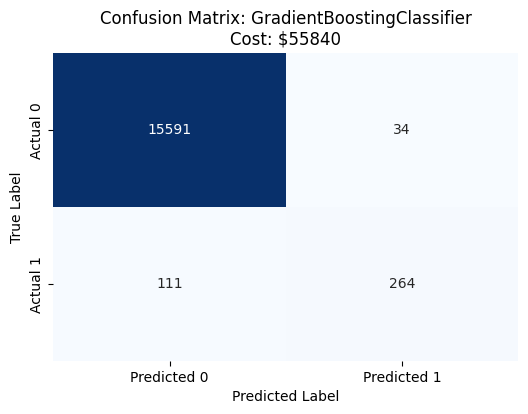


--- Classification Report (GradientBoostingClassifier) ---
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15625
           1       0.89      0.70      0.78       375

    accuracy                           0.99     16000
   macro avg       0.94      0.85      0.89     16000
weighted avg       0.99      0.99      0.99     16000

==================== LGBMClassifier ====================
[LightGBM] [Info] Number of positive: 1000, number of negative: 59000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033555 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38087
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 162
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016667 -> initscore=-4.077537
[LightGBM] [Info] Start training from score -4.077537


c:\CS\kish naik\APS_sensor_fault_detection\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


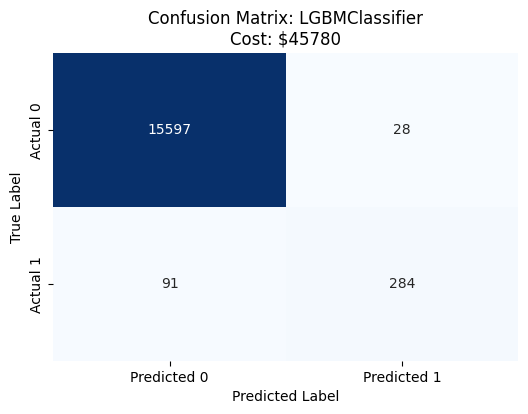

c:\CS\kish naik\APS_sensor_fault_detection\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



--- Classification Report (LGBMClassifier) ---
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15625
           1       0.91      0.76      0.83       375

    accuracy                           0.99     16000
   macro avg       0.95      0.88      0.91     16000
weighted avg       0.99      0.99      0.99     16000

==================== LogisticRegression ====================


c:\CS\kish naik\APS_sensor_fault_detection\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


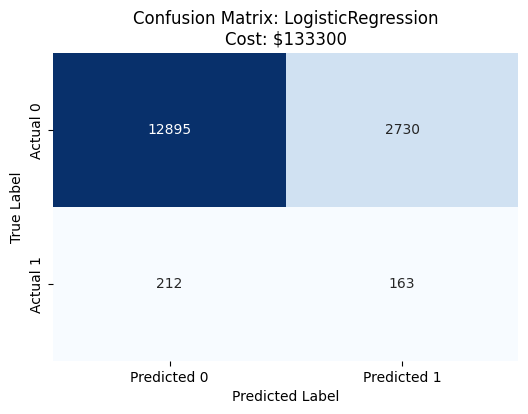


--- Classification Report (LogisticRegression) ---
              precision    recall  f1-score   support

           0       0.98      0.83      0.90     15625
           1       0.06      0.43      0.10       375

    accuracy                           0.82     16000
   macro avg       0.52      0.63      0.50     16000
weighted avg       0.96      0.82      0.88     16000

==================== KNeighborsClassifier ====================


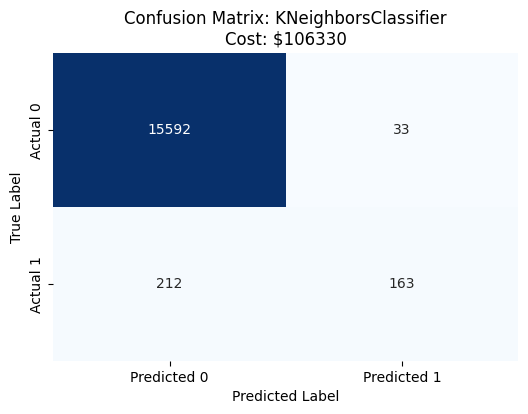


--- Classification Report (KNeighborsClassifier) ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15625
           1       0.83      0.43      0.57       375

    accuracy                           0.98     16000
   macro avg       0.91      0.72      0.78     16000
weighted avg       0.98      0.98      0.98     16000

==================== XGBClassifier ====================


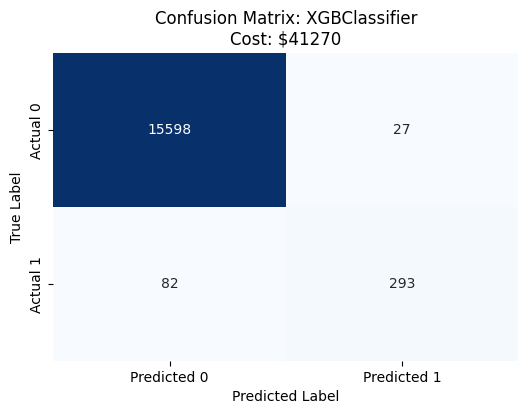


--- Classification Report (XGBClassifier) ---
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15625
           1       0.92      0.78      0.84       375

    accuracy                           0.99     16000
   macro avg       0.96      0.89      0.92     16000
weighted avg       0.99      0.99      0.99     16000

==================== CatBoostClassifier ====================


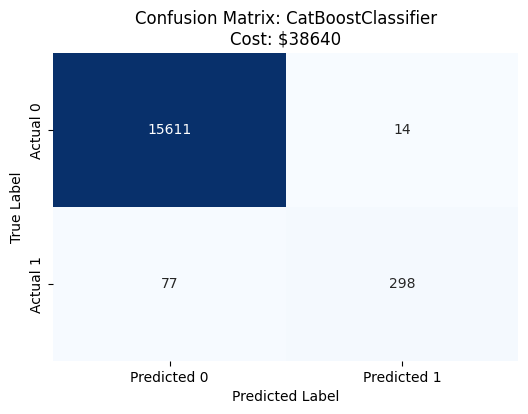


--- Classification Report (CatBoostClassifier) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15625
           1       0.96      0.79      0.87       375

    accuracy                           0.99     16000
   macro avg       0.98      0.90      0.93     16000
weighted avg       0.99      0.99      0.99     16000

==================== AdaBoostClassifier ====================


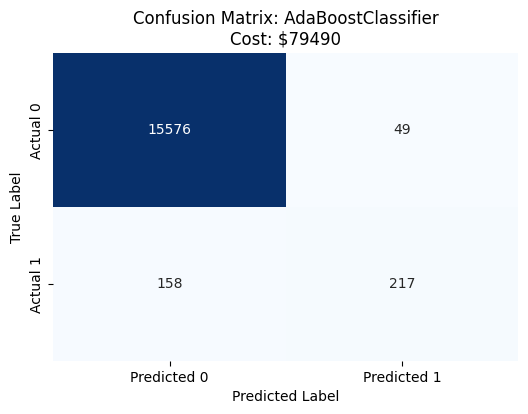


--- Classification Report (AdaBoostClassifier) ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15625
           1       0.82      0.58      0.68       375

    accuracy                           0.99     16000
   macro avg       0.90      0.79      0.84     16000
weighted avg       0.99      0.99      0.99     16000



In [35]:
report_mean = evaluate_models_detailed(X_train_mean, X_test_mean, y_train, y_test, models)

In [36]:
report_mean

Model    Cost  Accuracy  F1 Score  Precision  \
7          CatBoostClassifier   38640  0.994313  0.867540   0.955128   
6               XGBClassifier   41270  0.993188  0.843165   0.915625   
3              LGBMClassifier   45780  0.992563  0.826783   0.910256   
0      RandomForestClassifier   54670  0.992125  0.808511   0.939929   
2  GradientBoostingClassifier   55840  0.990938  0.784547   0.885906   
1      DecisionTreeClassifier   58220  0.988313  0.735502   0.783133   
8          AdaBoostClassifier   79490  0.987062  0.677067   0.815789   
5        KNeighborsClassifier  106330  0.984688  0.570928   0.831633   
4          LogisticRegression  133300  0.816125  0.099755   0.056343   

     Recall       MCC   ROC AUC  
7  0.794667  0.868480  0.997077  
6  0.781333  0.842466  0.994549  
3  0.757333  0.826652  0.994632  
0  0.709333  0.812889  0.994301  
2  0.704000  0.785359  0.992062  
1  0.693333  0.730964  0.844363  
8  0.578667  0.680979  0.990914  
5  0.434667  0.594915  0.859662  
4  0.434667  0.102184  0.567478

In [37]:
X_train_smt, y_train_smt = smt.fit_resample(X_train_mean, y_train)

In [38]:
X_train_smte, y_train_smte = smte.fit_resample(X_train_mean, y_train)

==================== RandomForestClassifier ====================


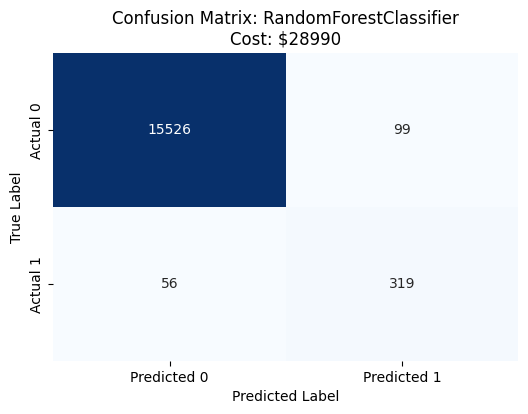


--- Classification Report (RandomForestClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15625
           1       0.76      0.85      0.80       375

    accuracy                           0.99     16000
   macro avg       0.88      0.92      0.90     16000
weighted avg       0.99      0.99      0.99     16000

==================== DecisionTreeClassifier ====================


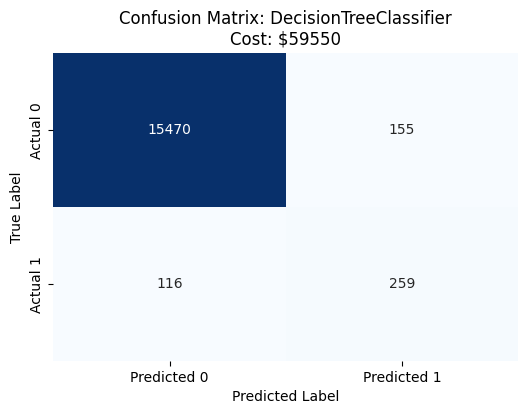


--- Classification Report (DecisionTreeClassifier) ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15625
           1       0.63      0.69      0.66       375

    accuracy                           0.98     16000
   macro avg       0.81      0.84      0.82     16000
weighted avg       0.98      0.98      0.98     16000

==================== GradientBoostingClassifier ====================


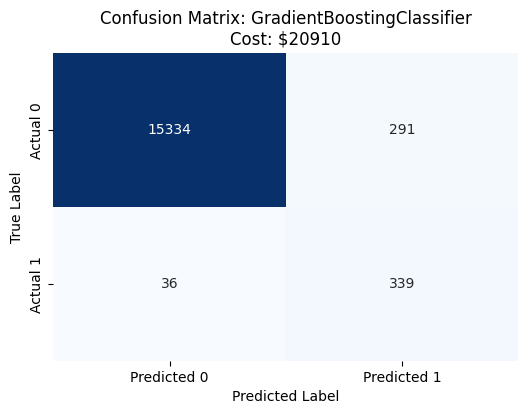


--- Classification Report (GradientBoostingClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     15625
           1       0.54      0.90      0.67       375

    accuracy                           0.98     16000
   macro avg       0.77      0.94      0.83     16000
weighted avg       0.99      0.98      0.98     16000

==================== LGBMClassifier ====================
[LightGBM] [Info] Number of positive: 58895, number of negative: 58895
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 41310
[LightGBM] [Info] Number of data points in the train set: 117790, number of used features: 162
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\CS\kish naik\APS_sensor_fault_detection\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


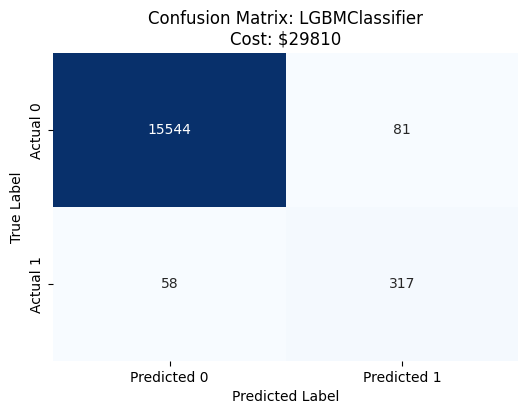

c:\CS\kish naik\APS_sensor_fault_detection\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



--- Classification Report (LGBMClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15625
           1       0.80      0.85      0.82       375

    accuracy                           0.99     16000
   macro avg       0.90      0.92      0.91     16000
weighted avg       0.99      0.99      0.99     16000

==================== LogisticRegression ====================


c:\CS\kish naik\APS_sensor_fault_detection\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


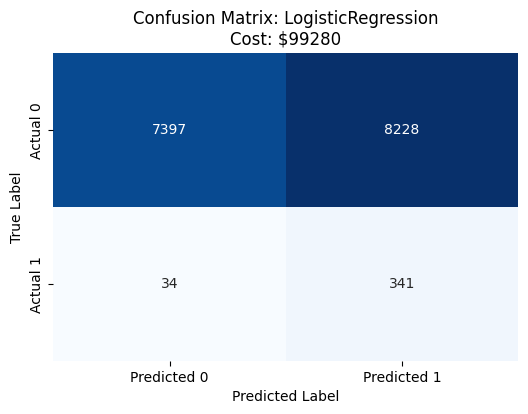


--- Classification Report (LogisticRegression) ---
              precision    recall  f1-score   support

           0       1.00      0.47      0.64     15625
           1       0.04      0.91      0.08       375

    accuracy                           0.48     16000
   macro avg       0.52      0.69      0.36     16000
weighted avg       0.97      0.48      0.63     16000

==================== KNeighborsClassifier ====================


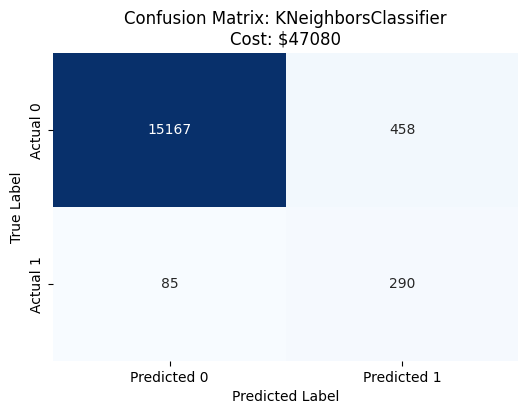


--- Classification Report (KNeighborsClassifier) ---
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     15625
           1       0.39      0.77      0.52       375

    accuracy                           0.97     16000
   macro avg       0.69      0.87      0.75     16000
weighted avg       0.98      0.97      0.97     16000

==================== XGBClassifier ====================


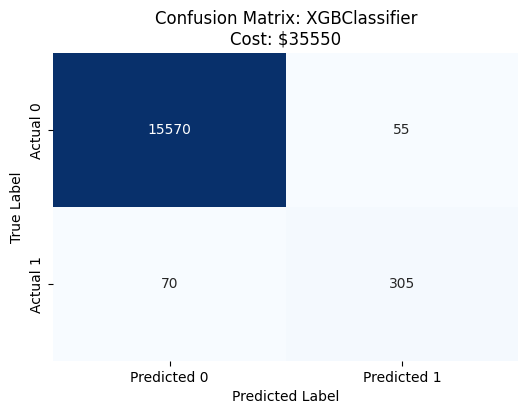


--- Classification Report (XGBClassifier) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15625
           1       0.85      0.81      0.83       375

    accuracy                           0.99     16000
   macro avg       0.92      0.90      0.91     16000
weighted avg       0.99      0.99      0.99     16000

==================== CatBoostClassifier ====================


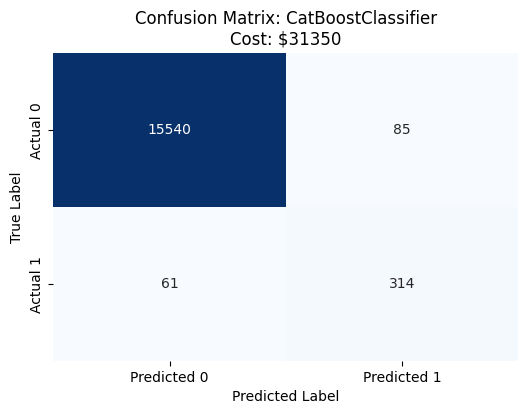


--- Classification Report (CatBoostClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15625
           1       0.79      0.84      0.81       375

    accuracy                           0.99     16000
   macro avg       0.89      0.92      0.90     16000
weighted avg       0.99      0.99      0.99     16000

==================== AdaBoostClassifier ====================


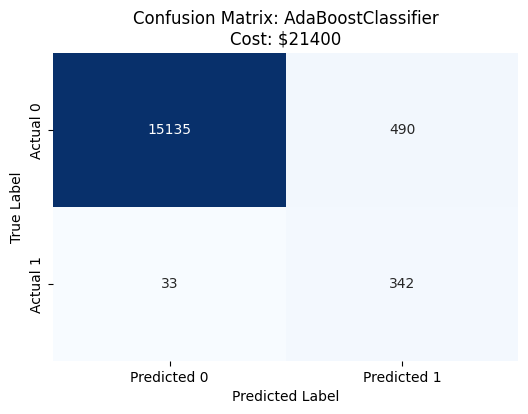


--- Classification Report (AdaBoostClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     15625
           1       0.41      0.91      0.57       375

    accuracy                           0.97     16000
   macro avg       0.70      0.94      0.77     16000
weighted avg       0.98      0.97      0.97     16000



In [39]:
report_mean_smt = evaluate_models_detailed(X_train_smt, X_test_mean, y_train_smt, y_test, models)

In [40]:
report_mean_smt

Model   Cost  Accuracy  F1 Score  Precision    Recall  \
2  GradientBoostingClassifier  20910  0.979563  0.674627   0.538095  0.904000   
8          AdaBoostClassifier  21400  0.967313  0.566694   0.411058  0.912000   
0      RandomForestClassifier  28990  0.990313  0.804540   0.763158  0.850667   
3              LGBMClassifier  29810  0.991313  0.820181   0.796482  0.845333   
7          CatBoostClassifier  31350  0.990875  0.811370   0.786967  0.837333   
6               XGBClassifier  35550  0.992188  0.829932   0.847222  0.813333   
5        KNeighborsClassifier  47080  0.966063  0.516474   0.387701  0.773333   
1      DecisionTreeClassifier  59550  0.983062  0.656527   0.625604  0.690667   
4          LogisticRegression  99280  0.483625  0.076252   0.039795  0.909333   

        MCC   ROC AUC  
2  0.688726  0.993157  
8  0.600065  0.989596  
0  0.800827  0.992855  
3  0.816113  0.994560  
7  0.807106  0.994448  
6  0.826116  0.993854  
5  0.533208  0.898801  
1  0.648700  0.840373  
4  0.116103  0.903604

==================== RandomForestClassifier ====================


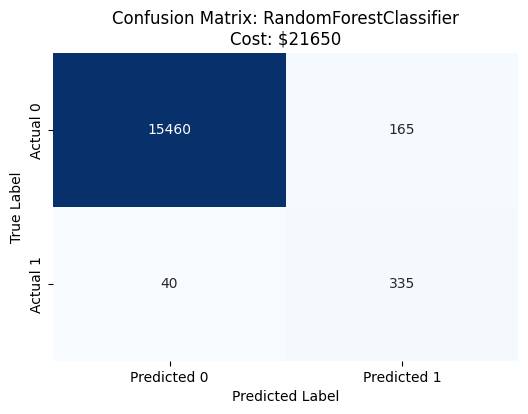


--- Classification Report (RandomForestClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15625
           1       0.67      0.89      0.77       375

    accuracy                           0.99     16000
   macro avg       0.83      0.94      0.88     16000
weighted avg       0.99      0.99      0.99     16000

==================== DecisionTreeClassifier ====================


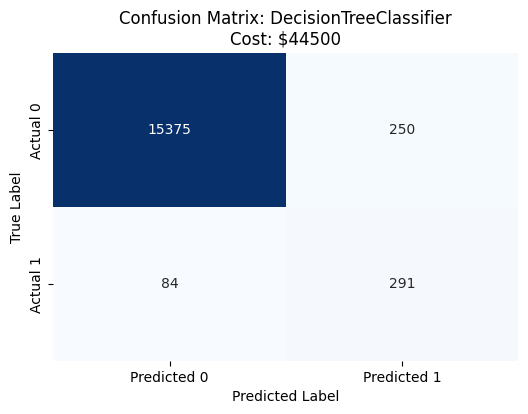


--- Classification Report (DecisionTreeClassifier) ---
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     15625
           1       0.54      0.78      0.64       375

    accuracy                           0.98     16000
   macro avg       0.77      0.88      0.81     16000
weighted avg       0.98      0.98      0.98     16000

==================== GradientBoostingClassifier ====================


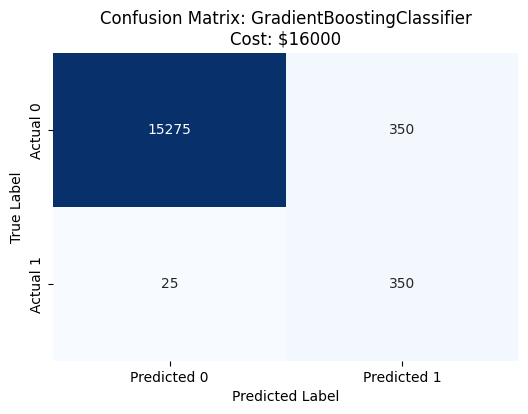


--- Classification Report (GradientBoostingClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     15625
           1       0.50      0.93      0.65       375

    accuracy                           0.98     16000
   macro avg       0.75      0.96      0.82     16000
weighted avg       0.99      0.98      0.98     16000

==================== LGBMClassifier ====================
[LightGBM] [Info] Number of positive: 58012, number of negative: 56585
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 41310
[LightGBM] [Info] Number of data points in the train set: 114597, number of used features: 162
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506226 -> initscore=0.024906
[LightGBM] [Info] Start training from score 0.024906


c:\CS\kish naik\APS_sensor_fault_detection\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


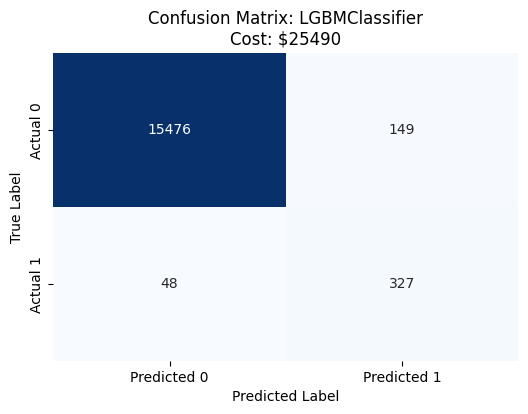

c:\CS\kish naik\APS_sensor_fault_detection\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



--- Classification Report (LGBMClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15625
           1       0.69      0.87      0.77       375

    accuracy                           0.99     16000
   macro avg       0.84      0.93      0.88     16000
weighted avg       0.99      0.99      0.99     16000

==================== LogisticRegression ====================


c:\CS\kish naik\APS_sensor_fault_detection\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


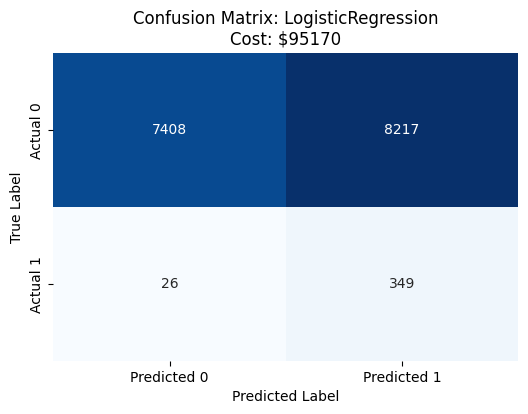


--- Classification Report (LogisticRegression) ---
              precision    recall  f1-score   support

           0       1.00      0.47      0.64     15625
           1       0.04      0.93      0.08       375

    accuracy                           0.48     16000
   macro avg       0.52      0.70      0.36     16000
weighted avg       0.97      0.48      0.63     16000

==================== KNeighborsClassifier ====================


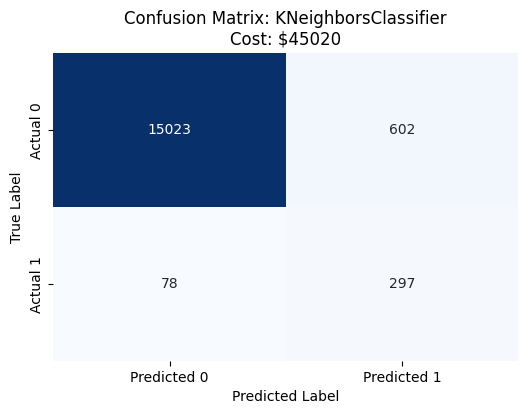


--- Classification Report (KNeighborsClassifier) ---
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     15625
           1       0.33      0.79      0.47       375

    accuracy                           0.96     16000
   macro avg       0.66      0.88      0.72     16000
weighted avg       0.98      0.96      0.97     16000

==================== XGBClassifier ====================


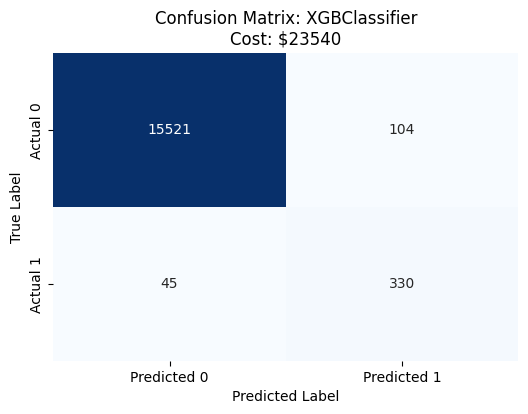


--- Classification Report (XGBClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15625
           1       0.76      0.88      0.82       375

    accuracy                           0.99     16000
   macro avg       0.88      0.94      0.91     16000
weighted avg       0.99      0.99      0.99     16000

==================== CatBoostClassifier ====================


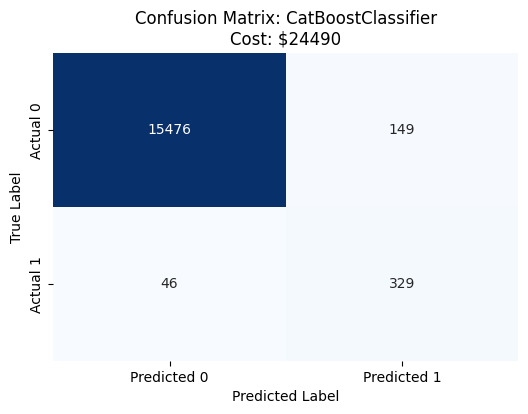


--- Classification Report (CatBoostClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15625
           1       0.69      0.88      0.77       375

    accuracy                           0.99     16000
   macro avg       0.84      0.93      0.88     16000
weighted avg       0.99      0.99      0.99     16000

==================== AdaBoostClassifier ====================


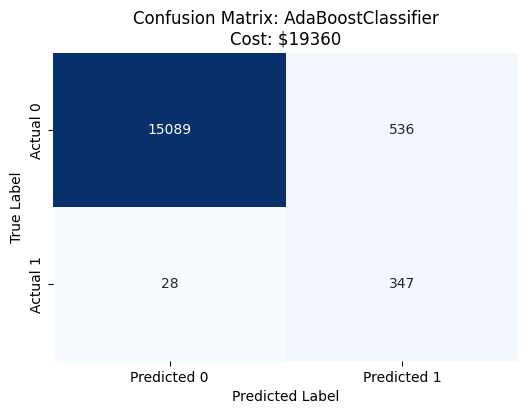


--- Classification Report (AdaBoostClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     15625
           1       0.39      0.93      0.55       375

    accuracy                           0.96     16000
   macro avg       0.70      0.95      0.77     16000
weighted avg       0.98      0.96      0.97     16000



In [41]:
report_mean_smte = evaluate_models_detailed(X_train_smte, X_test_mean, y_train_smte, y_test, models)

In [42]:
report_mean_smte

Model   Cost  Accuracy  F1 Score  Precision    Recall  \
2  GradientBoostingClassifier  16000  0.976562  0.651163   0.500000  0.933333   
8          AdaBoostClassifier  19360  0.964750  0.551669   0.392978  0.925333   
0      RandomForestClassifier  21650  0.987187  0.765714   0.670000  0.893333   
6               XGBClassifier  23540  0.990688  0.815822   0.760369  0.880000   
7          CatBoostClassifier  24490  0.987812  0.771395   0.688285  0.877333   
3              LGBMClassifier  25490  0.987688  0.768508   0.686975  0.872000   
1      DecisionTreeClassifier  44500  0.979125  0.635371   0.537893  0.776000   
5        KNeighborsClassifier  45020  0.957500  0.466248   0.330367  0.792000   
4          LogisticRegression  95170  0.484812  0.078067   0.040742  0.930667   

        MCC   ROC AUC  
2  0.673779  0.992383  
8  0.590343  0.989655  
0  0.767581  0.992634  
6  0.813350  0.994658  
7  0.771181  0.994676  
3  0.768000  0.994782  
1  0.636136  0.880000  
5  0.495006  0.901336  
4  0.122784  0.920591

#### Exp 3: Simple imputer with constant

In [43]:
const_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('Scaler', RobustScaler())
])

X_train_const = const_pipeline.fit_transform(X_train)
X_test_const = const_pipeline.transform(X_test)

==================== RandomForestClassifier ====================


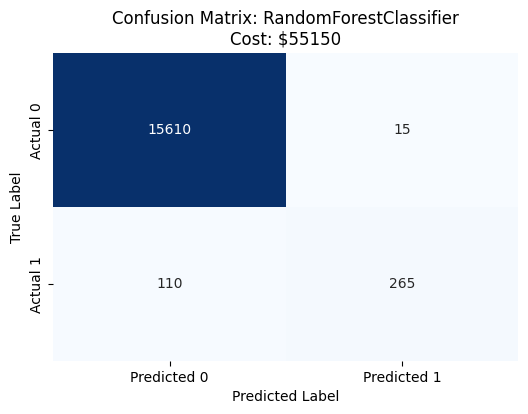


--- Classification Report (RandomForestClassifier) ---
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15625
           1       0.95      0.71      0.81       375

    accuracy                           0.99     16000
   macro avg       0.97      0.85      0.90     16000
weighted avg       0.99      0.99      0.99     16000

==================== DecisionTreeClassifier ====================


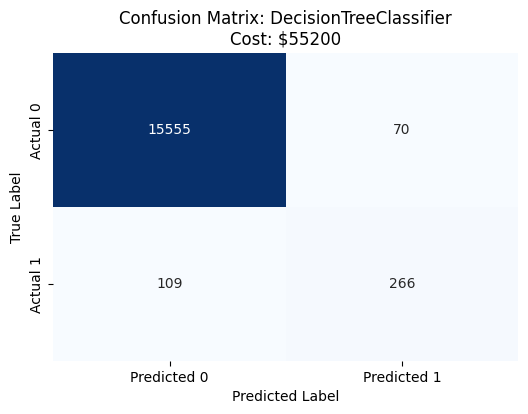


--- Classification Report (DecisionTreeClassifier) ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15625
           1       0.79      0.71      0.75       375

    accuracy                           0.99     16000
   macro avg       0.89      0.85      0.87     16000
weighted avg       0.99      0.99      0.99     16000

==================== GradientBoostingClassifier ====================


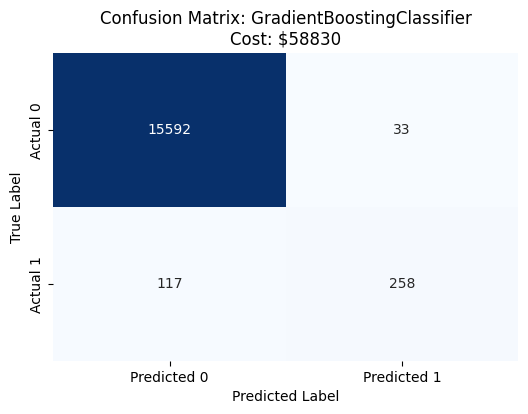


--- Classification Report (GradientBoostingClassifier) ---
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15625
           1       0.89      0.69      0.77       375

    accuracy                           0.99     16000
   macro avg       0.94      0.84      0.88     16000
weighted avg       0.99      0.99      0.99     16000

==================== LGBMClassifier ====================
[LightGBM] [Info] Number of positive: 1000, number of negative: 59000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 37770
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 162
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.016667 -> initscore=-4.077537
[LightGBM] [Info] Start training from score -4.077537


c:\CS\kish naik\APS_sensor_fault_detection\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


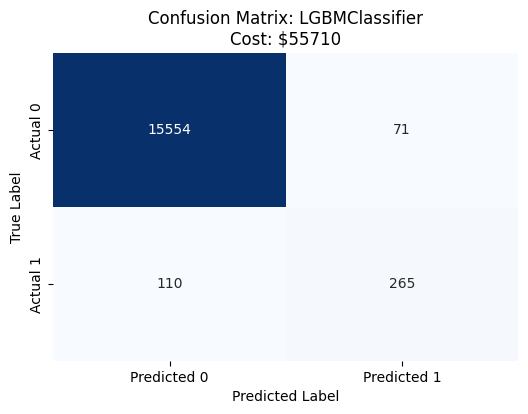

c:\CS\kish naik\APS_sensor_fault_detection\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



--- Classification Report (LGBMClassifier) ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15625
           1       0.79      0.71      0.75       375

    accuracy                           0.99     16000
   macro avg       0.89      0.85      0.87     16000
weighted avg       0.99      0.99      0.99     16000

==================== LogisticRegression ====================


c:\CS\kish naik\APS_sensor_fault_detection\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


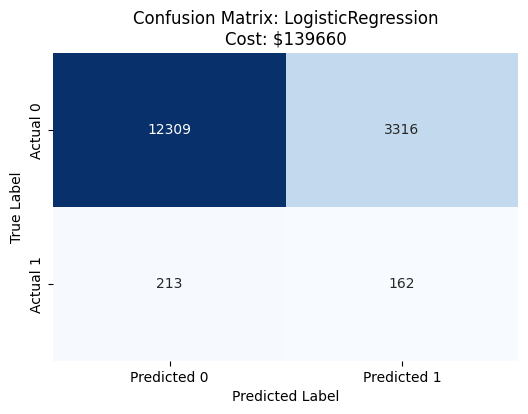


--- Classification Report (LogisticRegression) ---
              precision    recall  f1-score   support

           0       0.98      0.79      0.87     15625
           1       0.05      0.43      0.08       375

    accuracy                           0.78     16000
   macro avg       0.51      0.61      0.48     16000
weighted avg       0.96      0.78      0.86     16000

==================== KNeighborsClassifier ====================


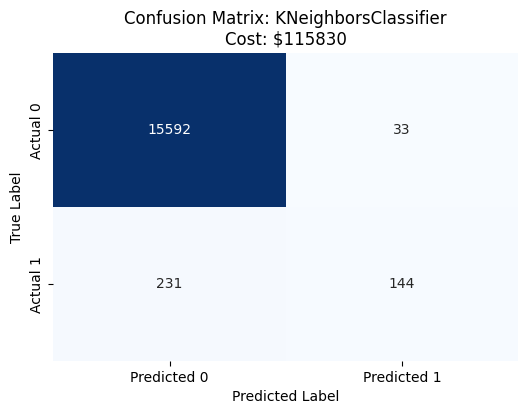


--- Classification Report (KNeighborsClassifier) ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15625
           1       0.81      0.38      0.52       375

    accuracy                           0.98     16000
   macro avg       0.90      0.69      0.76     16000
weighted avg       0.98      0.98      0.98     16000

==================== XGBClassifier ====================


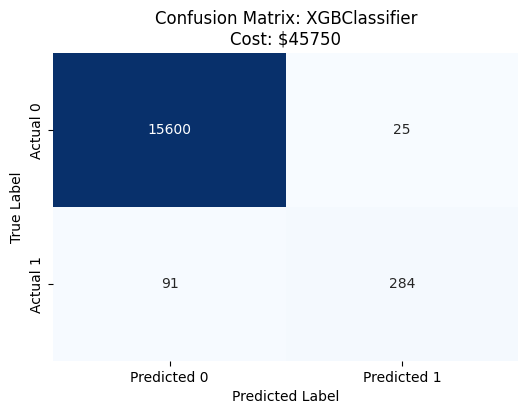


--- Classification Report (XGBClassifier) ---
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15625
           1       0.92      0.76      0.83       375

    accuracy                           0.99     16000
   macro avg       0.96      0.88      0.91     16000
weighted avg       0.99      0.99      0.99     16000

==================== CatBoostClassifier ====================


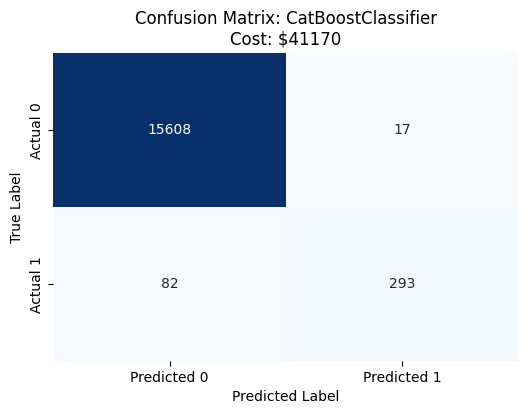


--- Classification Report (CatBoostClassifier) ---
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15625
           1       0.95      0.78      0.86       375

    accuracy                           0.99     16000
   macro avg       0.97      0.89      0.93     16000
weighted avg       0.99      0.99      0.99     16000

==================== AdaBoostClassifier ====================


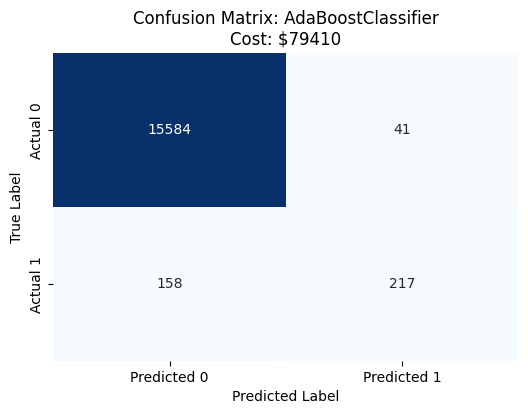


--- Classification Report (AdaBoostClassifier) ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15625
           1       0.84      0.58      0.69       375

    accuracy                           0.99     16000
   macro avg       0.92      0.79      0.84     16000
weighted avg       0.99      0.99      0.99     16000



In [44]:
report_const = evaluate_models_detailed(X_train_const, X_test_const, y_train, y_test, models)

In [45]:
report_const

Model    Cost  Accuracy  F1 Score  Precision  \
7          CatBoostClassifier   41170  0.993812  0.855474   0.945161   
6               XGBClassifier   45750  0.992750  0.830409   0.919094   
0      RandomForestClassifier   55150  0.992188  0.809160   0.946429   
1      DecisionTreeClassifier   55200  0.988812  0.748242   0.791667   
3              LGBMClassifier   55710  0.988688  0.745429   0.788690   
2  GradientBoostingClassifier   58830  0.990625  0.774775   0.886598   
8          AdaBoostClassifier   79410  0.987563  0.685624   0.841085   
5        KNeighborsClassifier  115830  0.983500  0.521739   0.813559   
4          LogisticRegression  139660  0.779438  0.084090   0.046578   

     Recall       MCC   ROC AUC  
7  0.781333  0.856376  0.997057  
6  0.757333  0.830787  0.991345  
0  0.706667  0.814225  0.993124  
1  0.709333  0.743710  0.852427  
3  0.706667  0.740828  0.989761  
2  0.688000  0.776530  0.994490  
8  0.578667  0.691895  0.991108  
5  0.384000  0.552371  0.855027  
4  0.432000  0.080613  0.564675

In [46]:
X_train_smt, y_train_smt = smt.fit_resample(X_train_const, y_train)

In [47]:
X_train_smte, y_train_smte = smte.fit_resample(X_train_const, y_train)

==================== RandomForestClassifier ====================


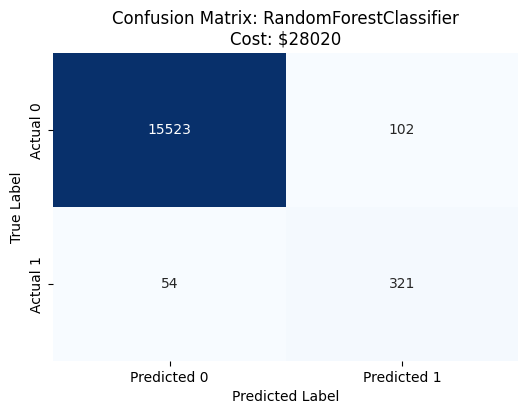


--- Classification Report (RandomForestClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15625
           1       0.76      0.86      0.80       375

    accuracy                           0.99     16000
   macro avg       0.88      0.92      0.90     16000
weighted avg       0.99      0.99      0.99     16000

==================== DecisionTreeClassifier ====================


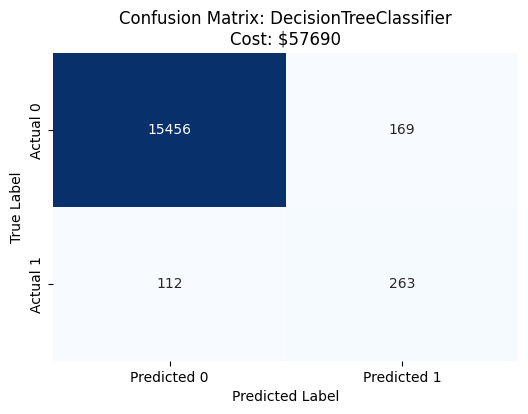


--- Classification Report (DecisionTreeClassifier) ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15625
           1       0.61      0.70      0.65       375

    accuracy                           0.98     16000
   macro avg       0.80      0.85      0.82     16000
weighted avg       0.98      0.98      0.98     16000

==================== GradientBoostingClassifier ====================


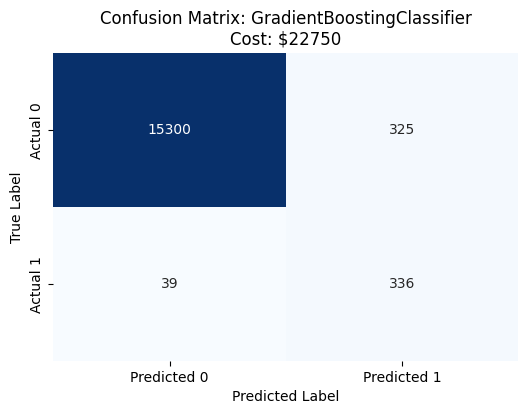


--- Classification Report (GradientBoostingClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     15625
           1       0.51      0.90      0.65       375

    accuracy                           0.98     16000
   macro avg       0.75      0.94      0.82     16000
weighted avg       0.99      0.98      0.98     16000

==================== LGBMClassifier ====================
[LightGBM] [Info] Number of positive: 58853, number of negative: 58853
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065792 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 40775
[LightGBM] [Info] Number of data points in the train set: 117706, number of used features: 163
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\CS\kish naik\APS_sensor_fault_detection\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


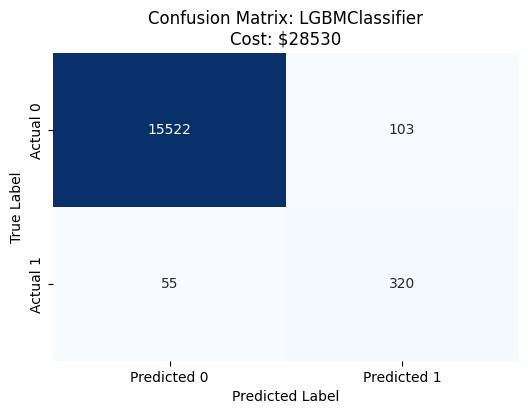

c:\CS\kish naik\APS_sensor_fault_detection\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



--- Classification Report (LGBMClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15625
           1       0.76      0.85      0.80       375

    accuracy                           0.99     16000
   macro avg       0.88      0.92      0.90     16000
weighted avg       0.99      0.99      0.99     16000

==================== LogisticRegression ====================


c:\CS\kish naik\APS_sensor_fault_detection\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


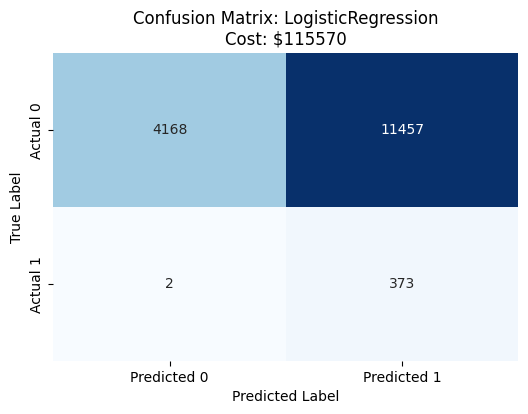


--- Classification Report (LogisticRegression) ---
              precision    recall  f1-score   support

           0       1.00      0.27      0.42     15625
           1       0.03      0.99      0.06       375

    accuracy                           0.28     16000
   macro avg       0.52      0.63      0.24     16000
weighted avg       0.98      0.28      0.41     16000

==================== KNeighborsClassifier ====================


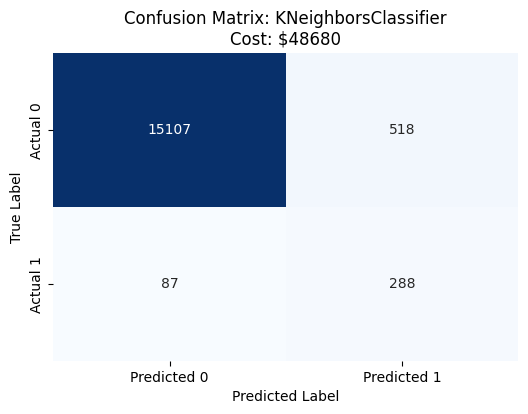


--- Classification Report (KNeighborsClassifier) ---
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     15625
           1       0.36      0.77      0.49       375

    accuracy                           0.96     16000
   macro avg       0.68      0.87      0.73     16000
weighted avg       0.98      0.96      0.97     16000

==================== XGBClassifier ====================


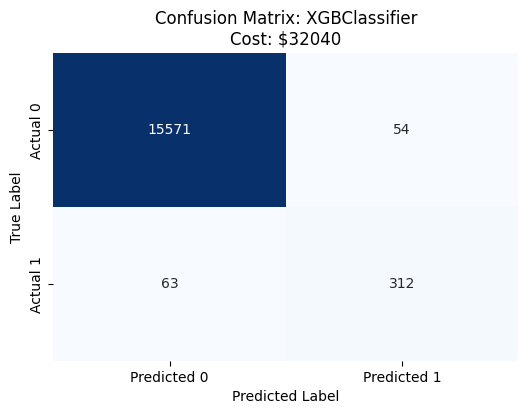


--- Classification Report (XGBClassifier) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15625
           1       0.85      0.83      0.84       375

    accuracy                           0.99     16000
   macro avg       0.92      0.91      0.92     16000
weighted avg       0.99      0.99      0.99     16000

==================== CatBoostClassifier ====================


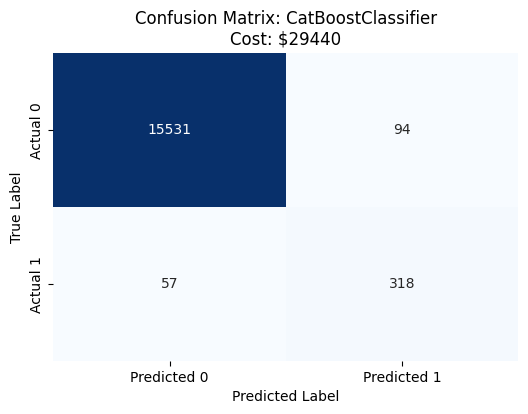


--- Classification Report (CatBoostClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15625
           1       0.77      0.85      0.81       375

    accuracy                           0.99     16000
   macro avg       0.88      0.92      0.90     16000
weighted avg       0.99      0.99      0.99     16000

==================== AdaBoostClassifier ====================


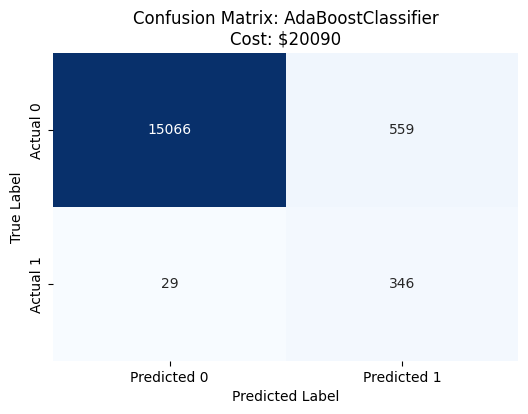


--- Classification Report (AdaBoostClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15625
           1       0.38      0.92      0.54       375

    accuracy                           0.96     16000
   macro avg       0.69      0.94      0.76     16000
weighted avg       0.98      0.96      0.97     16000



In [48]:
report_const_smt = evaluate_models_detailed(X_train_smt, X_test_const, y_train_smt, y_test, models)

In [49]:
report_const_smt

Model    Cost  Accuracy  F1 Score  Precision  \
8          AdaBoostClassifier   20090  0.963250  0.540625   0.382320   
2  GradientBoostingClassifier   22750  0.977250  0.648649   0.508321   
0      RandomForestClassifier   28020  0.990250  0.804511   0.758865   
3              LGBMClassifier   28530  0.990125  0.802005   0.756501   
7          CatBoostClassifier   29440  0.990563  0.808132   0.771845   
6               XGBClassifier   32040  0.992687  0.842105   0.852459   
5        KNeighborsClassifier   48680  0.962187  0.487722   0.357320   
1      DecisionTreeClassifier   57690  0.982437  0.651797   0.608796   
4          LogisticRegression  115570  0.283813  0.061122   0.031530   

     Recall       MCC   ROC AUC  
8  0.922667  0.580838  0.990010  
2  0.896000  0.665325  0.991413  
0  0.856000  0.801056  0.993308  
3  0.853333  0.798480  0.993886  
7  0.848000  0.804240  0.994164  
6  0.832000  0.838428  0.995119  
5  0.768000  0.508299  0.894788  
1  0.701333  0.644528  0.845259  
4  0.994667  0.090095  0.952879

==================== RandomForestClassifier ====================


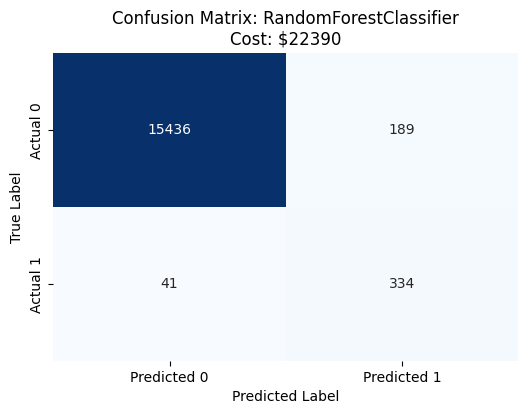


--- Classification Report (RandomForestClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15625
           1       0.64      0.89      0.74       375

    accuracy                           0.99     16000
   macro avg       0.82      0.94      0.87     16000
weighted avg       0.99      0.99      0.99     16000

==================== DecisionTreeClassifier ====================


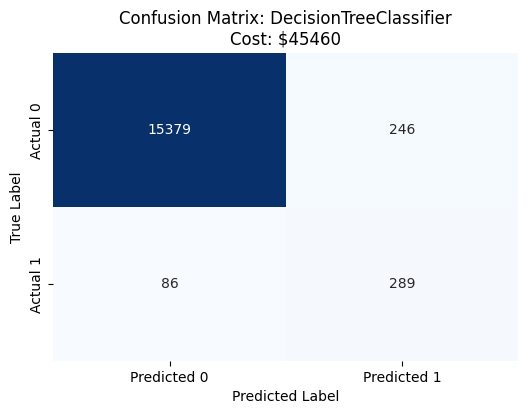


--- Classification Report (DecisionTreeClassifier) ---
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     15625
           1       0.54      0.77      0.64       375

    accuracy                           0.98     16000
   macro avg       0.77      0.88      0.81     16000
weighted avg       0.98      0.98      0.98     16000

==================== GradientBoostingClassifier ====================


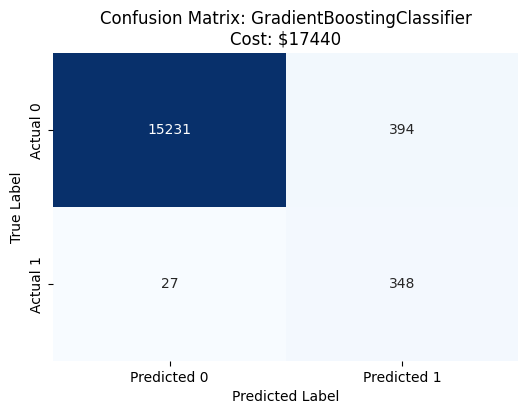


--- Classification Report (GradientBoostingClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     15625
           1       0.47      0.93      0.62       375

    accuracy                           0.97     16000
   macro avg       0.73      0.95      0.80     16000
weighted avg       0.99      0.97      0.98     16000

==================== LGBMClassifier ====================
[LightGBM] [Info] Number of positive: 57851, number of negative: 56222
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 40762
[LightGBM] [Info] Number of data points in the train set: 114073, number of used features: 163
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507140 -> initscore=0.028563
[LightGBM] [Info] Start training from score 0.028563


c:\CS\kish naik\APS_sensor_fault_detection\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


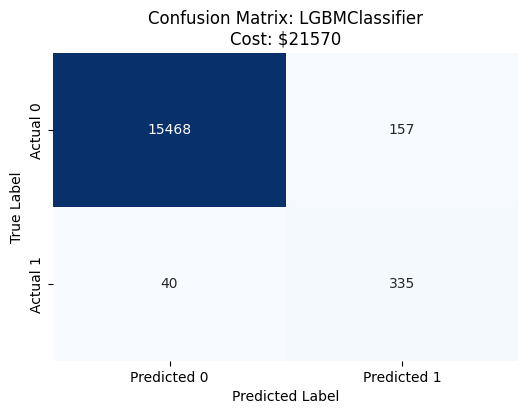

c:\CS\kish naik\APS_sensor_fault_detection\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



--- Classification Report (LGBMClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15625
           1       0.68      0.89      0.77       375

    accuracy                           0.99     16000
   macro avg       0.84      0.94      0.88     16000
weighted avg       0.99      0.99      0.99     16000

==================== LogisticRegression ====================


c:\CS\kish naik\APS_sensor_fault_detection\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


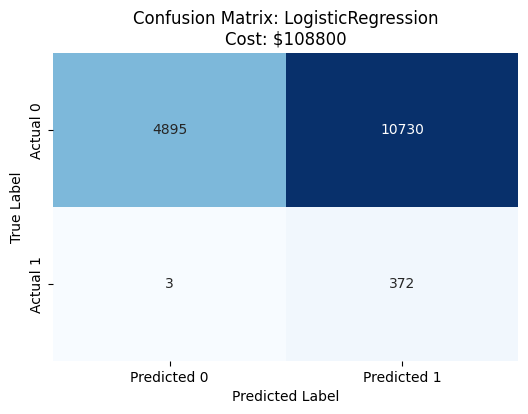


--- Classification Report (LogisticRegression) ---
              precision    recall  f1-score   support

           0       1.00      0.31      0.48     15625
           1       0.03      0.99      0.06       375

    accuracy                           0.33     16000
   macro avg       0.52      0.65      0.27     16000
weighted avg       0.98      0.33      0.47     16000

==================== KNeighborsClassifier ====================


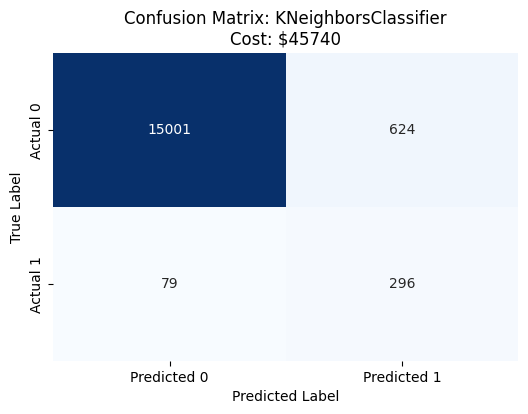


--- Classification Report (KNeighborsClassifier) ---
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     15625
           1       0.32      0.79      0.46       375

    accuracy                           0.96     16000
   macro avg       0.66      0.87      0.72     16000
weighted avg       0.98      0.96      0.96     16000

==================== XGBClassifier ====================


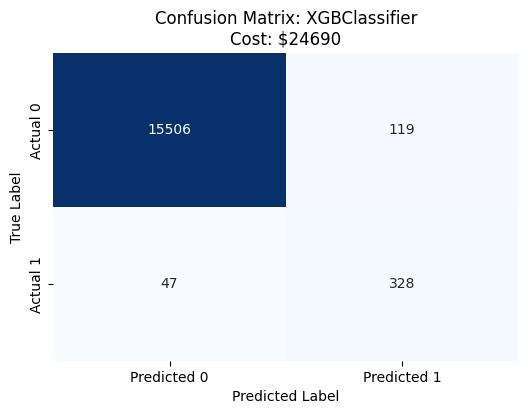


--- Classification Report (XGBClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15625
           1       0.73      0.87      0.80       375

    accuracy                           0.99     16000
   macro avg       0.87      0.93      0.90     16000
weighted avg       0.99      0.99      0.99     16000

==================== CatBoostClassifier ====================


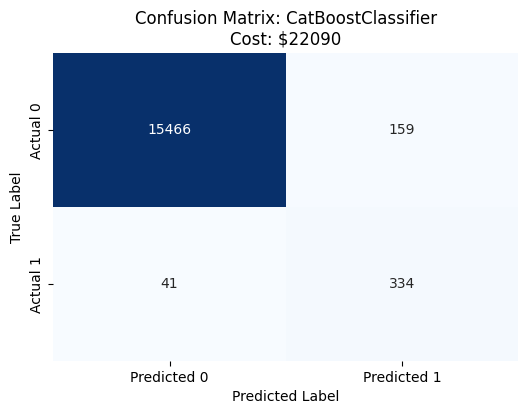


--- Classification Report (CatBoostClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15625
           1       0.68      0.89      0.77       375

    accuracy                           0.99     16000
   macro avg       0.84      0.94      0.88     16000
weighted avg       0.99      0.99      0.99     16000

==================== AdaBoostClassifier ====================


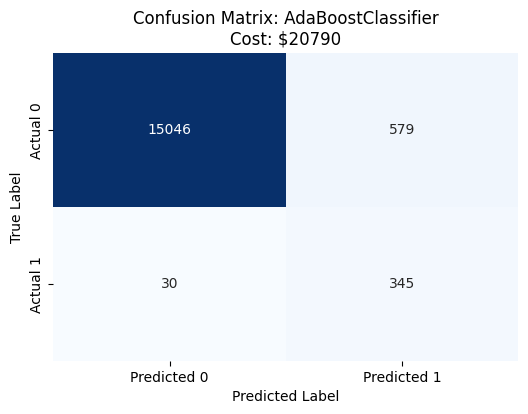


--- Classification Report (AdaBoostClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15625
           1       0.37      0.92      0.53       375

    accuracy                           0.96     16000
   macro avg       0.69      0.94      0.76     16000
weighted avg       0.98      0.96      0.97     16000



In [50]:
report_const_smte = evaluate_models_detailed(X_train_smte, X_test_const, y_train_smte, y_test, models)

In [51]:
report_const_smte

Model    Cost  Accuracy  F1 Score  Precision  \
2  GradientBoostingClassifier   17440  0.973688  0.623098   0.469003   
8          AdaBoostClassifier   20790  0.961938  0.531178   0.373377   
3              LGBMClassifier   21570  0.987688  0.772780   0.680894   
7          CatBoostClassifier   22090  0.987500  0.769585   0.677485   
0      RandomForestClassifier   22390  0.985625  0.743875   0.638623   
6               XGBClassifier   24690  0.989625  0.798054   0.733781   
1      DecisionTreeClassifier   45460  0.979250  0.635165   0.540187   
5        KNeighborsClassifier   45740  0.956063  0.457143   0.321739   
4          LogisticRegression  108800  0.329188  0.064825   0.033507   

     Recall       MCC   ROC AUC  
2  0.928000  0.649469  0.989091  
8  0.920000  0.572637  0.989173  
3  0.893333  0.774045  0.994397  
7  0.890667  0.770838  0.995014  
0  0.890667  0.747495  0.993762  
6  0.874667  0.795993  0.995121  
1  0.770667  0.635296  0.877461  
5  0.789333  0.487016  0.895289  
4  0.992000  0.100211  0.953267

#### Exp 4: Multivariate imputation by chained equations (MICE)

In [159]:
import miceforest as mf

X_train_mice = X_train.copy()

kernel = mf.ImputationKernel(X_train_mice, random_state=42, save_all_iterations_data=True)
kernel.mice(3, verbose=True)

Initialized logger with name MICE Iterations 1 - 3 and 4 levels
1 Dataset 0
 | bt_000 | ci_000 | ck_000 | cj_000 | by_000 | ao_000 | bi_000 | aq_000 | bj_000 | am_0 | ai_000 | as_000 | au_000 | aj_000 | at_000 | an_000 | bh_000 | al_000 | ap_000 | bg_000 | bb_000 | ah_000 | cs_000 | cs_002 | cs_003 | cs_006 | cs_004 | cs_005 | cs_001 | cs_009 | cs_008 | cs_007 | az_007 | az_008 | az_009 | az_003 | az_004 | az_005 | az_006 | ay_009 | az_000 | az_001 | az_002 | ay_006 | ay_003 | ag_005 | ag_003 | ag_004 | ag_000 | ag_001 | ay_000 | ay_001 | ag_008 | ag_009 | ag_006 | ag_007 | ay_005 | ay_008 | ay_007 | ag_002 | ay_002 | ay_004 | ee_003 | ee_002 | ee_008 | ee_009 | ee_007 | ee_006 | ee_005 | ee_004 | ee_000 | ee_001 | cd_000 | cn_009 | cn_004 | cn_000 | cn_002 | cn_007 | cn_001 | cn_008 | cn_003 | cn_005 | cn_006 | ba_008 | ba_000 | ba_004 | ba_009 | ba_002 | ba_007 | ba_001 | ba_003 | ba_005 | ba_006 | bv_000 | cq_000 | bu_000 | dn_000 | bs_000 | cb_000 | av_000 | ae_000 | af_000 | bf_00

In [160]:
X_train_mice_imputed = kernel.complete_data()
X_test_mice_imputed = kernel.impute_new_data(X_test).complete_data()

In [161]:
mice_pipeline = Pipeline(steps=[
    ('Scaler', RobustScaler())
])

X_train_mice = mice_pipeline.fit_transform(X_train_mice_imputed)
X_test_mice = mice_pipeline.transform(X_test_mice_imputed)

==================== RandomForestClassifier ====================


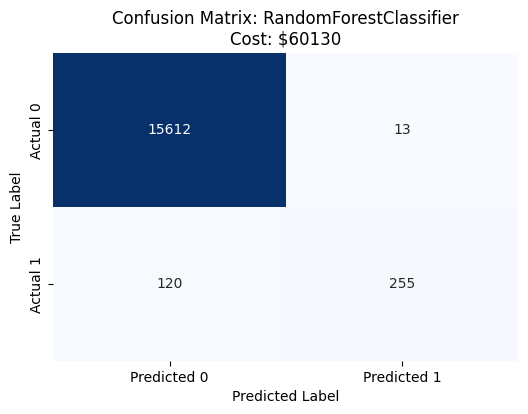


--- Classification Report (RandomForestClassifier) ---
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15625
           1       0.95      0.68      0.79       375

    accuracy                           0.99     16000
   macro avg       0.97      0.84      0.89     16000
weighted avg       0.99      0.99      0.99     16000

==================== DecisionTreeClassifier ====================


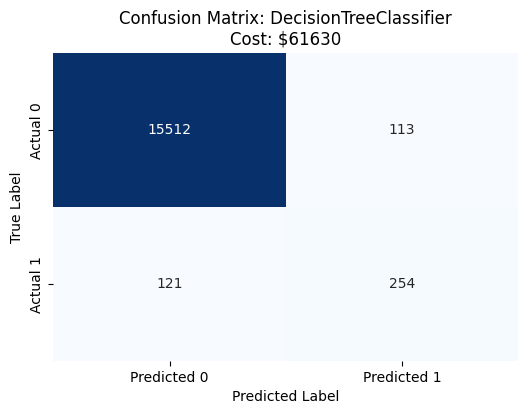


--- Classification Report (DecisionTreeClassifier) ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15625
           1       0.69      0.68      0.68       375

    accuracy                           0.99     16000
   macro avg       0.84      0.84      0.84     16000
weighted avg       0.99      0.99      0.99     16000

==================== GradientBoostingClassifier ====================


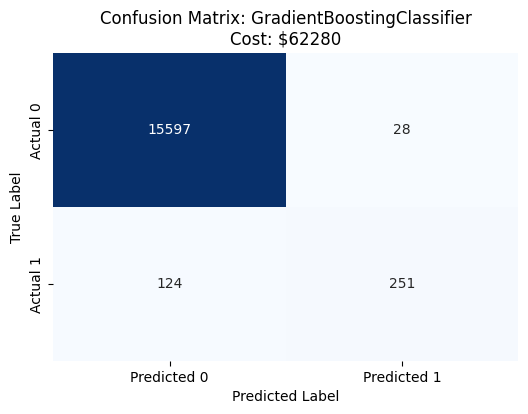


--- Classification Report (GradientBoostingClassifier) ---
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15625
           1       0.90      0.67      0.77       375

    accuracy                           0.99     16000
   macro avg       0.95      0.83      0.88     16000
weighted avg       0.99      0.99      0.99     16000

==================== LogisticRegression ====================


c:\CS\kish naik\APS_sensor_fault_detection\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


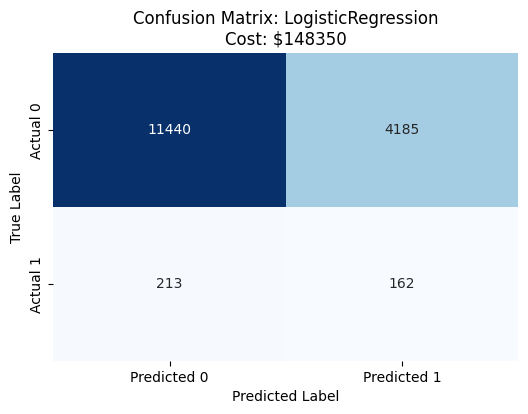


--- Classification Report (LogisticRegression) ---
              precision    recall  f1-score   support

           0       0.98      0.73      0.84     15625
           1       0.04      0.43      0.07       375

    accuracy                           0.73     16000
   macro avg       0.51      0.58      0.45     16000
weighted avg       0.96      0.73      0.82     16000

==================== KNeighborsClassifier ====================


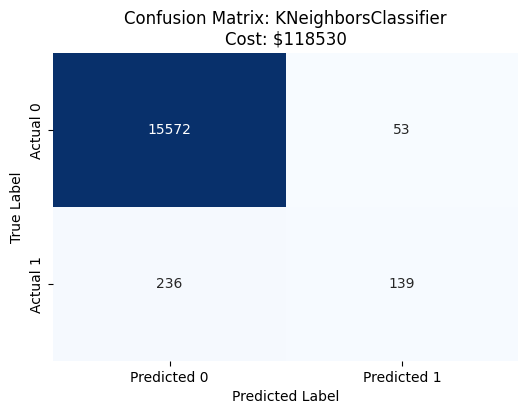


--- Classification Report (KNeighborsClassifier) ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15625
           1       0.72      0.37      0.49       375

    accuracy                           0.98     16000
   macro avg       0.85      0.68      0.74     16000
weighted avg       0.98      0.98      0.98     16000

==================== XGBClassifier ====================


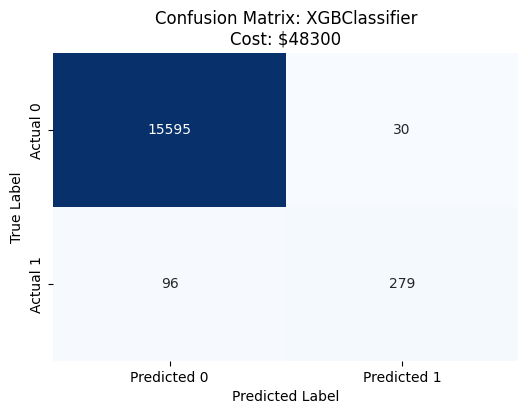


--- Classification Report (XGBClassifier) ---
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15625
           1       0.90      0.74      0.82       375

    accuracy                           0.99     16000
   macro avg       0.95      0.87      0.91     16000
weighted avg       0.99      0.99      0.99     16000

==================== CatBoostClassifier ====================


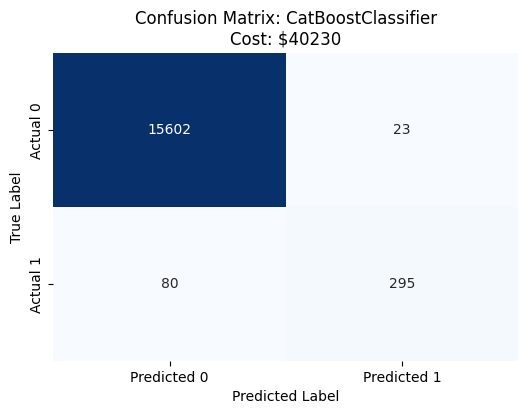


--- Classification Report (CatBoostClassifier) ---
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15625
           1       0.93      0.79      0.85       375

    accuracy                           0.99     16000
   macro avg       0.96      0.89      0.92     16000
weighted avg       0.99      0.99      0.99     16000

==================== AdaBoostClassifier ====================


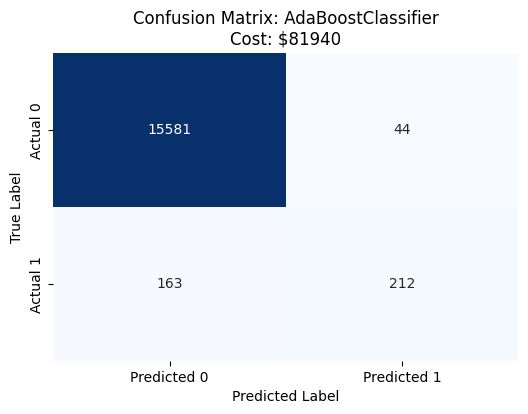


--- Classification Report (AdaBoostClassifier) ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15625
           1       0.83      0.57      0.67       375

    accuracy                           0.99     16000
   macro avg       0.91      0.78      0.83     16000
weighted avg       0.99      0.99      0.99     16000



In [162]:
report_mice = evaluate_models_detailed(X_train_mice, X_test_mice, y_train, y_test, models)

In [163]:
report_mice

Model    Cost  Accuracy  F1 Score  Precision  \
6          CatBoostClassifier   40230  0.993563  0.851371   0.927673   
5               XGBClassifier   48300  0.992125  0.815789   0.902913   
0      RandomForestClassifier   60130  0.991688  0.793157   0.951493   
1      DecisionTreeClassifier   61630  0.985375  0.684636   0.692098   
2  GradientBoostingClassifier   62280  0.990500  0.767584   0.899642   
7          AdaBoostClassifier   81940  0.987062  0.671949   0.828125   
4        KNeighborsClassifier  118530  0.981938  0.490300   0.723958   
3          LogisticRegression  148350  0.725125  0.068615   0.037267   

     Recall       MCC   ROC AUC  
6  0.786667  0.851116  0.996491  
5  0.744000  0.815778  0.991243  
0  0.680000  0.800651  0.991038  
1  0.677333  0.677192  0.835051  
2  0.669333  0.771546  0.994490  
7  0.565333  0.678241  0.990487  
4  0.370667  0.510302  0.819484  
3  0.432000  0.055832  0.558242

In [29]:
X_train_smt, y_train_smt = smt.fit_resample(X_train_mice, y_train)

In [30]:
X_train_smte, y_train_smte = smte.fit_resample(X_train_mice, y_train)

==================== RandomForestClassifier ====================


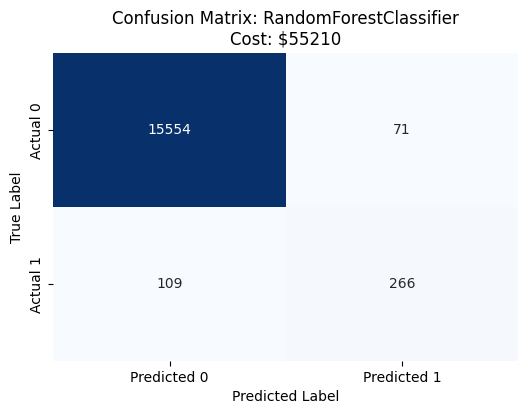


--- Classification Report (RandomForestClassifier) ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15625
           1       0.79      0.71      0.75       375

    accuracy                           0.99     16000
   macro avg       0.89      0.85      0.87     16000
weighted avg       0.99      0.99      0.99     16000

==================== DecisionTreeClassifier ====================


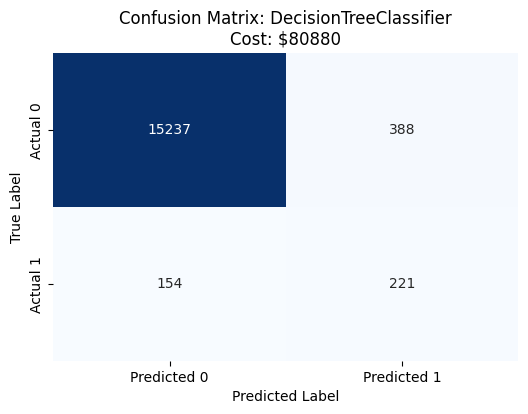


--- Classification Report (DecisionTreeClassifier) ---
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     15625
           1       0.36      0.59      0.45       375

    accuracy                           0.97     16000
   macro avg       0.68      0.78      0.72     16000
weighted avg       0.98      0.97      0.97     16000

==================== GradientBoostingClassifier ====================


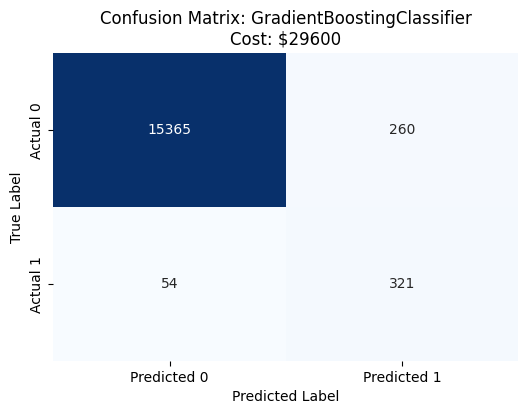


--- Classification Report (GradientBoostingClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     15625
           1       0.55      0.86      0.67       375

    accuracy                           0.98     16000
   macro avg       0.77      0.92      0.83     16000
weighted avg       0.99      0.98      0.98     16000

==================== LogisticRegression ====================


c:\CS\kish naik\APS_sensor_fault_detection\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


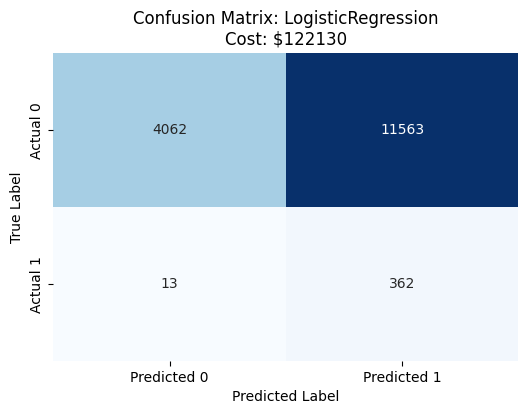


--- Classification Report (LogisticRegression) ---
              precision    recall  f1-score   support

           0       1.00      0.26      0.41     15625
           1       0.03      0.97      0.06       375

    accuracy                           0.28     16000
   macro avg       0.51      0.61      0.24     16000
weighted avg       0.97      0.28      0.40     16000

==================== KNeighborsClassifier ====================


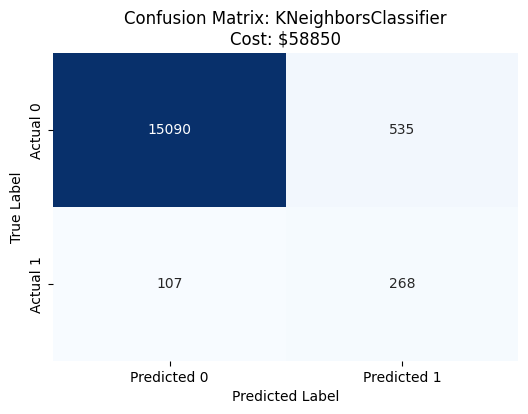


--- Classification Report (KNeighborsClassifier) ---
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     15625
           1       0.33      0.71      0.46       375

    accuracy                           0.96     16000
   macro avg       0.66      0.84      0.72     16000
weighted avg       0.98      0.96      0.97     16000

==================== XGBClassifier ====================


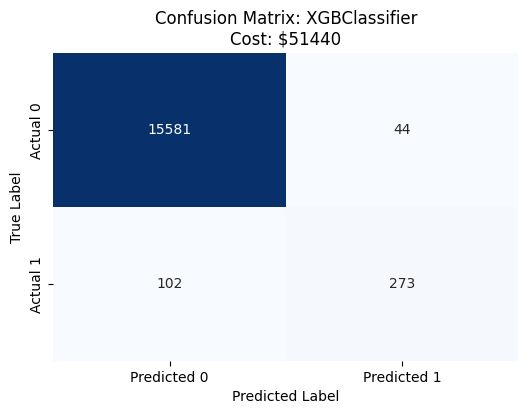


--- Classification Report (XGBClassifier) ---
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     15625
           1       0.86      0.73      0.79       375

    accuracy                           0.99     16000
   macro avg       0.93      0.86      0.89     16000
weighted avg       0.99      0.99      0.99     16000

==================== CatBoostClassifier ====================


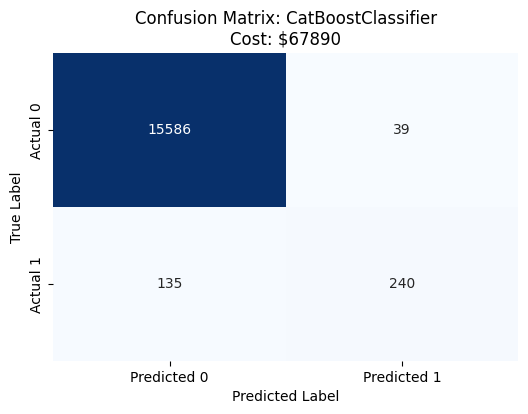


--- Classification Report (CatBoostClassifier) ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15625
           1       0.86      0.64      0.73       375

    accuracy                           0.99     16000
   macro avg       0.93      0.82      0.86     16000
weighted avg       0.99      0.99      0.99     16000

==================== AdaBoostClassifier ====================


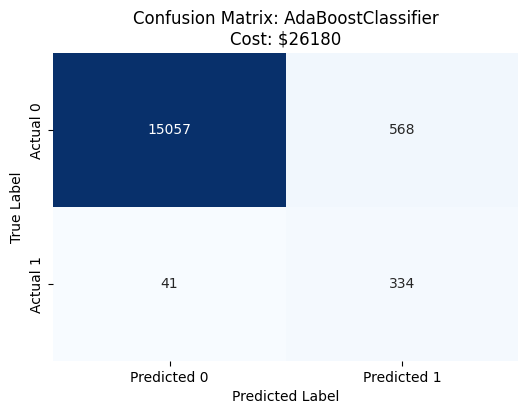


--- Classification Report (AdaBoostClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15625
           1       0.37      0.89      0.52       375

    accuracy                           0.96     16000
   macro avg       0.68      0.93      0.75     16000
weighted avg       0.98      0.96      0.97     16000



In [31]:
report_mice_smt = evaluate_models_detailed(X_train_smt, X_test_mice, y_train_smt, y_test, models)

In [32]:
report_mice_smt

Model    Cost  Accuracy  F1 Score  Precision  \
7          AdaBoostClassifier   26180  0.961938  0.523101   0.370288   
2  GradientBoostingClassifier   29600  0.980375  0.671548   0.552496   
5               XGBClassifier   51440  0.990875  0.789017   0.861199   
0      RandomForestClassifier   55210  0.988750  0.747191   0.789318   
4        KNeighborsClassifier   58850  0.959875  0.455008   0.333748   
6          CatBoostClassifier   67890  0.989125  0.733945   0.860215   
1      DecisionTreeClassifier   80880  0.966125  0.449187   0.362890   
3          LogisticRegression  122130  0.276500  0.058862   0.030356   

     Recall       MCC   ROC AUC  
7  0.890667  0.560377  0.985183  
2  0.856000  0.678825  0.990886  
5  0.728000  0.787281  0.991700  
0  0.709333  0.742562  0.990805  
4  0.714667  0.471488  0.873578  
6  0.640000  0.736828  0.981829  
1  0.589333  0.446322  0.782251  
3  0.965333  0.078234  0.932516

==================== RandomForestClassifier ====================


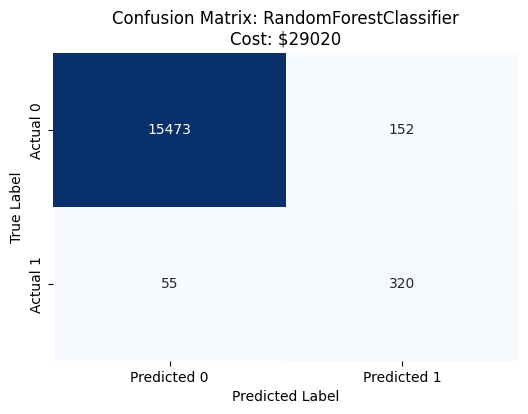


--- Classification Report (RandomForestClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15625
           1       0.68      0.85      0.76       375

    accuracy                           0.99     16000
   macro avg       0.84      0.92      0.87     16000
weighted avg       0.99      0.99      0.99     16000

==================== DecisionTreeClassifier ====================


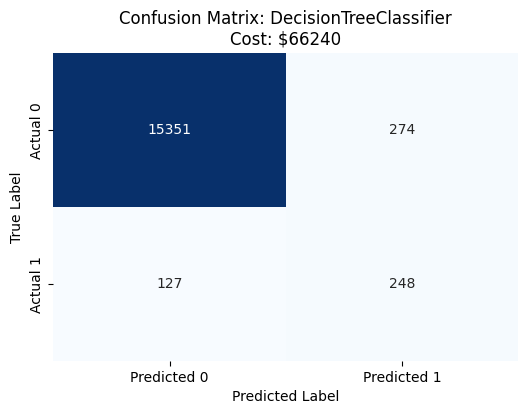


--- Classification Report (DecisionTreeClassifier) ---
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     15625
           1       0.48      0.66      0.55       375

    accuracy                           0.97     16000
   macro avg       0.73      0.82      0.77     16000
weighted avg       0.98      0.97      0.98     16000

==================== GradientBoostingClassifier ====================


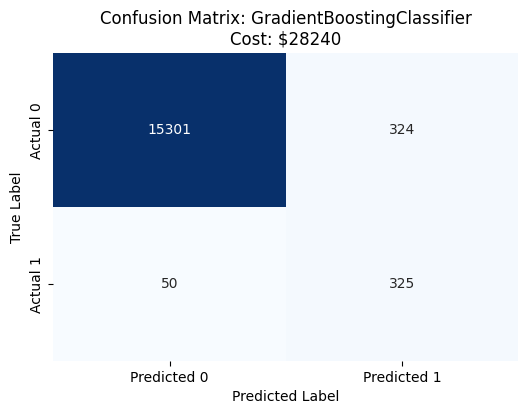


--- Classification Report (GradientBoostingClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     15625
           1       0.50      0.87      0.63       375

    accuracy                           0.98     16000
   macro avg       0.75      0.92      0.81     16000
weighted avg       0.99      0.98      0.98     16000

==================== LogisticRegression ====================


c:\CS\kish naik\APS_sensor_fault_detection\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


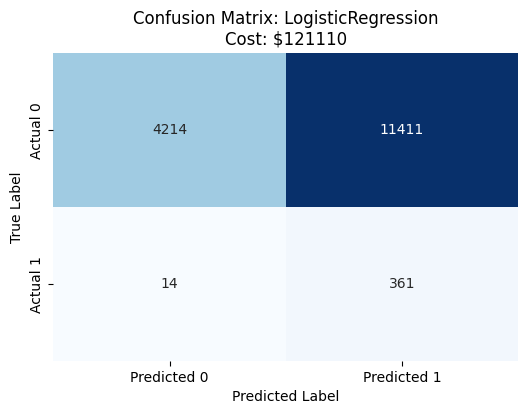


--- Classification Report (LogisticRegression) ---
              precision    recall  f1-score   support

           0       1.00      0.27      0.42     15625
           1       0.03      0.96      0.06       375

    accuracy                           0.29     16000
   macro avg       0.51      0.62      0.24     16000
weighted avg       0.97      0.29      0.42     16000

==================== KNeighborsClassifier ====================


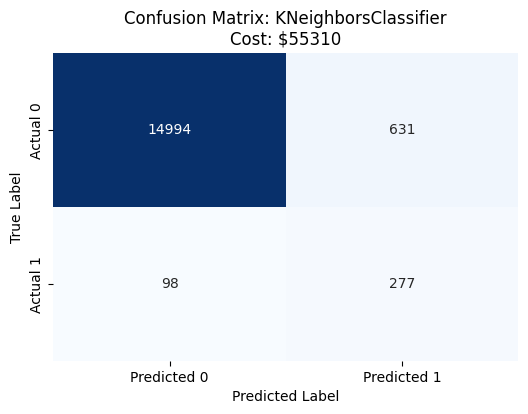


--- Classification Report (KNeighborsClassifier) ---
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     15625
           1       0.31      0.74      0.43       375

    accuracy                           0.95     16000
   macro avg       0.65      0.85      0.70     16000
weighted avg       0.98      0.95      0.96     16000

==================== XGBClassifier ====================


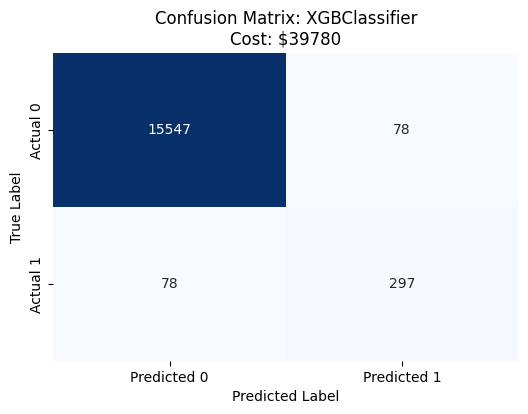


--- Classification Report (XGBClassifier) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15625
           1       0.79      0.79      0.79       375

    accuracy                           0.99     16000
   macro avg       0.89      0.89      0.89     16000
weighted avg       0.99      0.99      0.99     16000

==================== CatBoostClassifier ====================


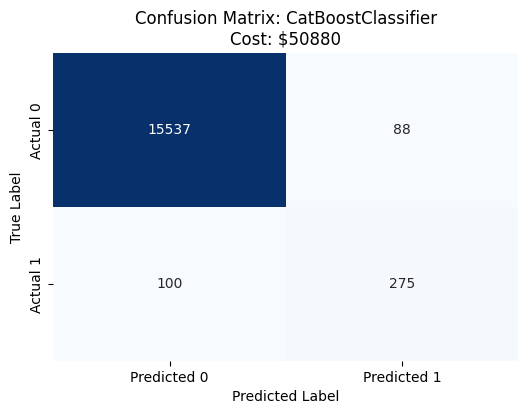


--- Classification Report (CatBoostClassifier) ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15625
           1       0.76      0.73      0.75       375

    accuracy                           0.99     16000
   macro avg       0.88      0.86      0.87     16000
weighted avg       0.99      0.99      0.99     16000

==================== AdaBoostClassifier ====================


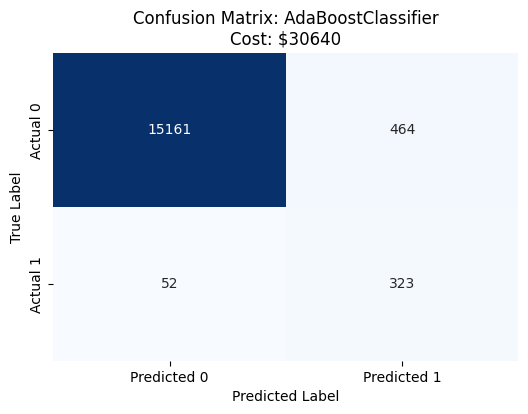


--- Classification Report (AdaBoostClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     15625
           1       0.41      0.86      0.56       375

    accuracy                           0.97     16000
   macro avg       0.70      0.92      0.77     16000
weighted avg       0.98      0.97      0.97     16000



In [33]:
report_mice_smte = evaluate_models_detailed(X_train_smte, X_test_mice, y_train_smte, y_test, models)

In [34]:
report_mice_smte

Model    Cost  Accuracy  F1 Score  Precision  \
2  GradientBoostingClassifier   28240  0.976625  0.634766   0.500770   
0      RandomForestClassifier   29020  0.987062  0.755608   0.677966   
7          AdaBoostClassifier   30640  0.967750  0.555938   0.410419   
5               XGBClassifier   39780  0.990250  0.792000   0.792000   
6          CatBoostClassifier   50880  0.988250  0.745257   0.757576   
4        KNeighborsClassifier   55310  0.954438  0.431800   0.305066   
1      DecisionTreeClassifier   66240  0.974938  0.552954   0.475096   
3          LogisticRegression  121110  0.285938  0.059439   0.030666   

     Recall       MCC   ROC AUC  
2  0.866667  0.648739  0.984995  
0  0.853333  0.754286  0.990829  
7  0.861333  0.581788  0.981123  
5  0.792000  0.787008  0.992944  
6  0.733333  0.739348  0.990779  
4  0.738667  0.456605  0.880555  
1  0.661333  0.548254  0.821899  
3  0.962667  0.079726  0.931255

#### Exp 5: KNN imputer 

##### Too computationally expensive and could not even run an experiment 

In [ ]:
# robustscaler = RobustScaler()
# X_train_knn = robustscaler.fit_transform(X_train)

In [ ]:
# # Finding the optimal n_neighbor value for KNN imputer
# results = []

# strategies = [str(i) for i in [3, 5, 7, 9, 11]]

# for s in strategies:
#     pipeline = Pipeline(steps=[
#         ('imputer', KNNImputer(n_neighbors=int(s))), 
#         ('model', XGBClassifier())
#     ])
#     scores = cross_val_score(pipeline, X_train_knn, y_train, scoring='f1', cv=3, n_jobs=-1)
#     results.append(scores)
#     print(f"n_neighbors= {s} || f1 score ({mean(scores):.4f})")

KeyboardInterrupt: 

#### Exp 6: Principle component analysis with median imputation

#### PCA is a technique for feature extraction. It helps reduce the dimensionality while retaining the most valuable variables.

In [164]:
from sklearn.decomposition import PCA

pca_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

In [165]:
X_train_pca = pca_pipeline.fit_transform(X_train)
X_test_pca = pca_pipeline.transform(X_test)

In [49]:
#Applying PCA
var_ratio={}
for n in range(2,150):
    pc=PCA(n_components=n)
    df_pca=pc.fit(X_train_pca)
    var_ratio[n]=sum(df_pca.explained_variance_ratio_)

<Axes: >

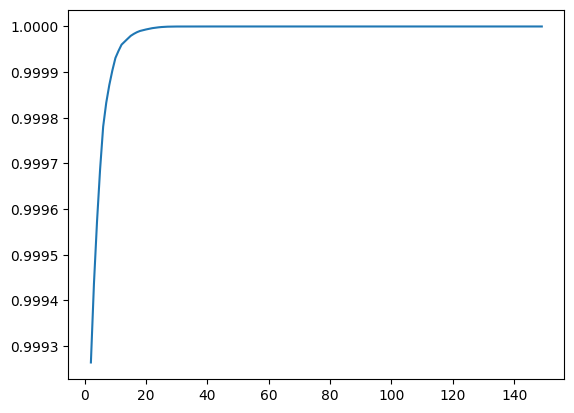

In [50]:
# plotting variance ratio
pd.Series(var_ratio).plot()

<Figure size 500x500 with 0 Axes>

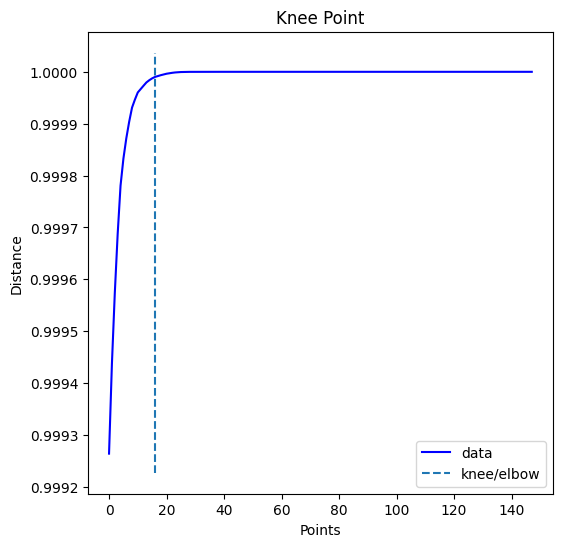

Knee Locator k = 18


In [51]:
from kneed import KneeLocator

i = np.arange(len(var_ratio))
variance_ratio= list(var_ratio.values())
components=  list(var_ratio.keys())
knee = KneeLocator(i, variance_ratio, S=1, curve='concave', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()
k= components[knee.knee]
print('Knee Locator k =', k)

In [166]:
# Reducing the dimensions of the data 
pca_final = PCA(n_components=18, random_state=42)

X_train_reduced = pca_final.fit_transform(X_train_pca)
X_test_reduced = pca_final.transform(X_test_pca)

==================== RandomForestClassifier ====================


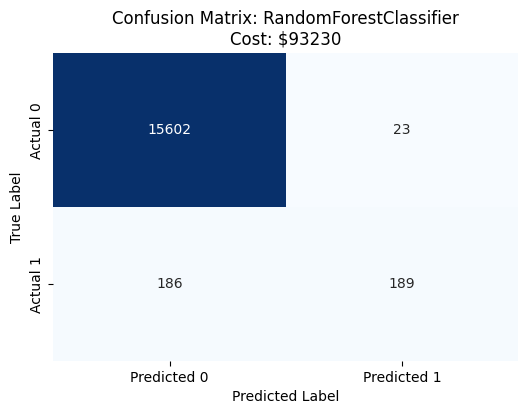


--- Classification Report (RandomForestClassifier) ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15625
           1       0.89      0.50      0.64       375

    accuracy                           0.99     16000
   macro avg       0.94      0.75      0.82     16000
weighted avg       0.99      0.99      0.99     16000

==================== DecisionTreeClassifier ====================


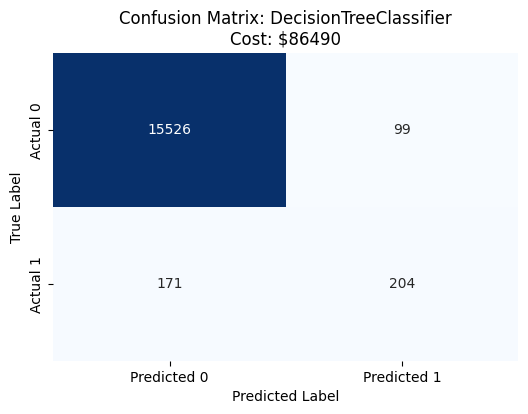


--- Classification Report (DecisionTreeClassifier) ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15625
           1       0.67      0.54      0.60       375

    accuracy                           0.98     16000
   macro avg       0.83      0.77      0.80     16000
weighted avg       0.98      0.98      0.98     16000

==================== GradientBoostingClassifier ====================


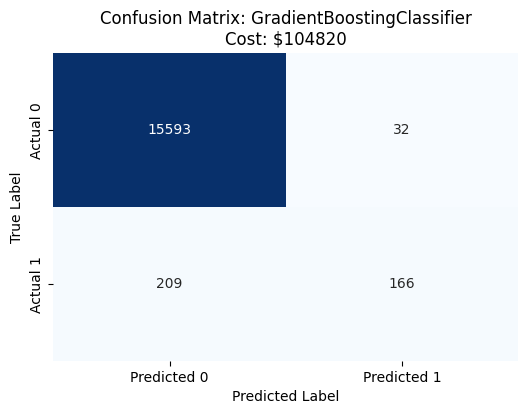


--- Classification Report (GradientBoostingClassifier) ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15625
           1       0.84      0.44      0.58       375

    accuracy                           0.98     16000
   macro avg       0.91      0.72      0.79     16000
weighted avg       0.98      0.98      0.98     16000

==================== LogisticRegression ====================


c:\CS\kish naik\APS_sensor_fault_detection\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


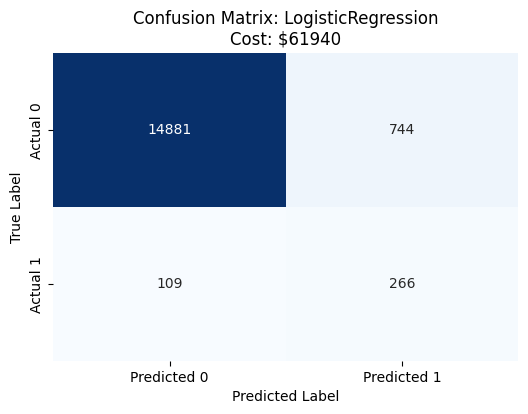


--- Classification Report (LogisticRegression) ---
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     15625
           1       0.26      0.71      0.38       375

    accuracy                           0.95     16000
   macro avg       0.63      0.83      0.68     16000
weighted avg       0.98      0.95      0.96     16000

==================== KNeighborsClassifier ====================


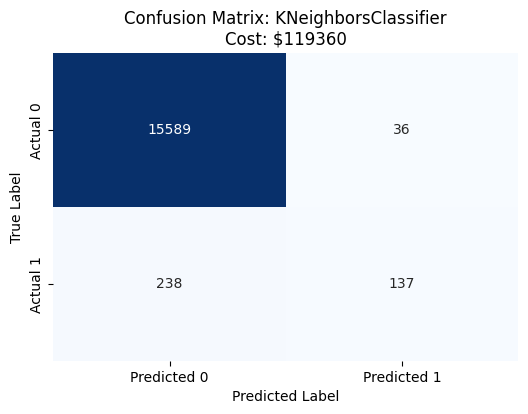


--- Classification Report (KNeighborsClassifier) ---
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     15625
           1       0.79      0.37      0.50       375

    accuracy                           0.98     16000
   macro avg       0.89      0.68      0.75     16000
weighted avg       0.98      0.98      0.98     16000

==================== XGBClassifier ====================


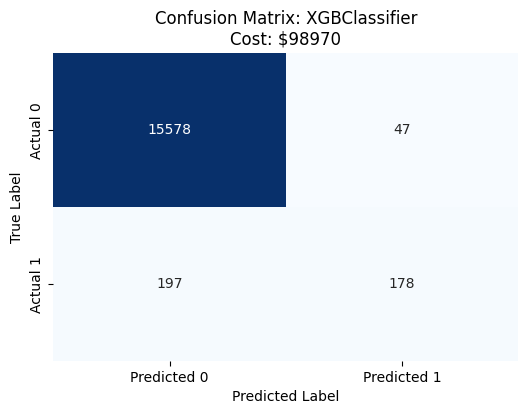


--- Classification Report (XGBClassifier) ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15625
           1       0.79      0.47      0.59       375

    accuracy                           0.98     16000
   macro avg       0.89      0.74      0.79     16000
weighted avg       0.98      0.98      0.98     16000

==================== CatBoostClassifier ====================


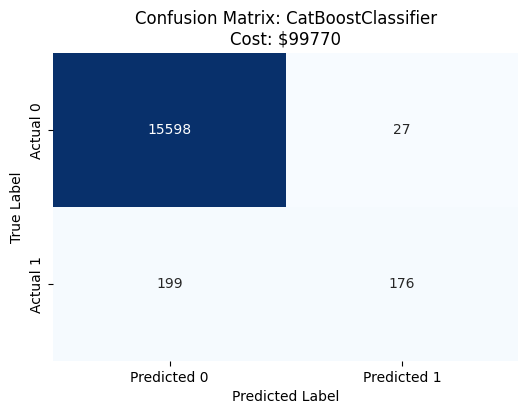


--- Classification Report (CatBoostClassifier) ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15625
           1       0.87      0.47      0.61       375

    accuracy                           0.99     16000
   macro avg       0.93      0.73      0.80     16000
weighted avg       0.98      0.99      0.98     16000

==================== AdaBoostClassifier ====================


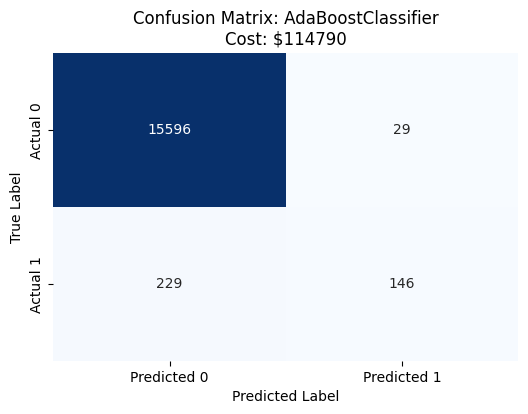


--- Classification Report (AdaBoostClassifier) ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15625
           1       0.83      0.39      0.53       375

    accuracy                           0.98     16000
   macro avg       0.91      0.69      0.76     16000
weighted avg       0.98      0.98      0.98     16000



In [167]:
report_knn = evaluate_models_detailed(X_train_reduced, X_test_reduced, y_train, y_test, models)

In [168]:
report_knn

Model    Cost  Accuracy  F1 Score  Precision  \
3          LogisticRegression   61940  0.946688  0.384116   0.263366   
1      DecisionTreeClassifier   86490  0.983125  0.601770   0.673267   
0      RandomForestClassifier   93230  0.986938  0.643952   0.891509   
5               XGBClassifier   98970  0.984750  0.593333   0.791111   
6          CatBoostClassifier   99770  0.985875  0.608997   0.866995   
2  GradientBoostingClassifier  104820  0.984938  0.579407   0.838384   
7          AdaBoostClassifier  114790  0.983875  0.530909   0.834286   
4        KNeighborsClassifier  119360  0.982875  0.500000   0.791908   

     Recall       MCC   ROC AUC  
3  0.709333  0.411658  0.886009  
1  0.544000  0.596770  0.767807  
0  0.504000  0.664897  0.955827  
5  0.474667  0.606007  0.952762  
6  0.469333  0.632077  0.975535  
2  0.442667  0.602976  0.960213  
7  0.389333  0.563613  0.961947  
4  0.365333  0.531062  0.838740

In [53]:
X_train_smt, y_train_smt = smt.fit_resample(X_train_reduced, y_train)

In [54]:
X_train_smte, y_train_smte = smte.fit_resample(X_train_reduced, y_train)

==================== RandomForestClassifier ====================


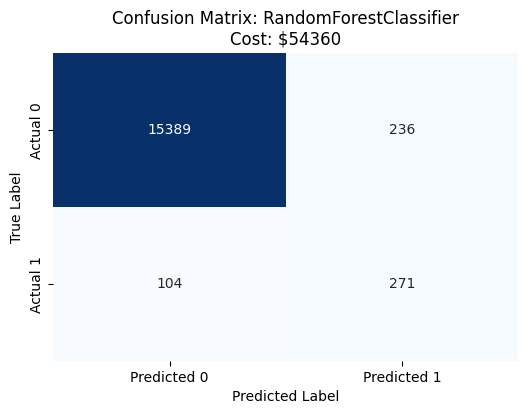


--- Classification Report (RandomForestClassifier) ---
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     15625
           1       0.53      0.72      0.61       375

    accuracy                           0.98     16000
   macro avg       0.76      0.85      0.80     16000
weighted avg       0.98      0.98      0.98     16000

==================== DecisionTreeClassifier ====================


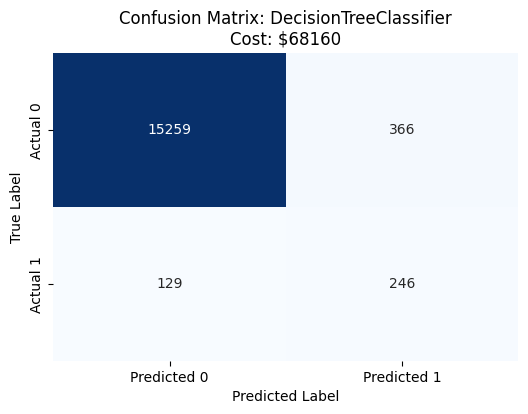


--- Classification Report (DecisionTreeClassifier) ---
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     15625
           1       0.40      0.66      0.50       375

    accuracy                           0.97     16000
   macro avg       0.70      0.82      0.74     16000
weighted avg       0.98      0.97      0.97     16000

==================== GradientBoostingClassifier ====================


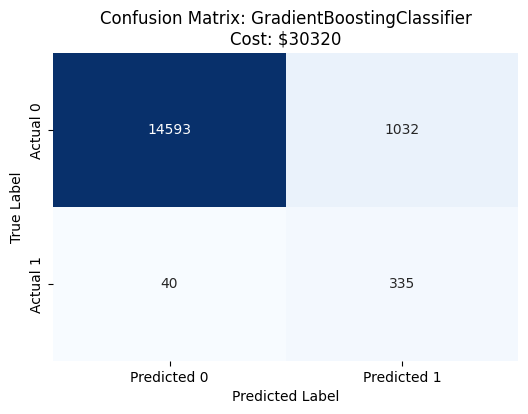


--- Classification Report (GradientBoostingClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     15625
           1       0.25      0.89      0.38       375

    accuracy                           0.93     16000
   macro avg       0.62      0.91      0.67     16000
weighted avg       0.98      0.93      0.95     16000

==================== LogisticRegression ====================


c:\CS\kish naik\APS_sensor_fault_detection\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


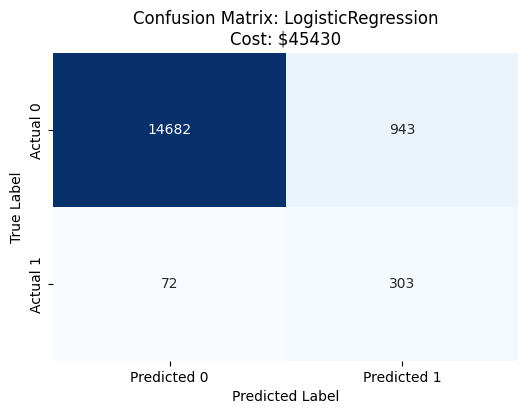


--- Classification Report (LogisticRegression) ---
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     15625
           1       0.24      0.81      0.37       375

    accuracy                           0.94     16000
   macro avg       0.62      0.87      0.67     16000
weighted avg       0.98      0.94      0.95     16000

==================== KNeighborsClassifier ====================


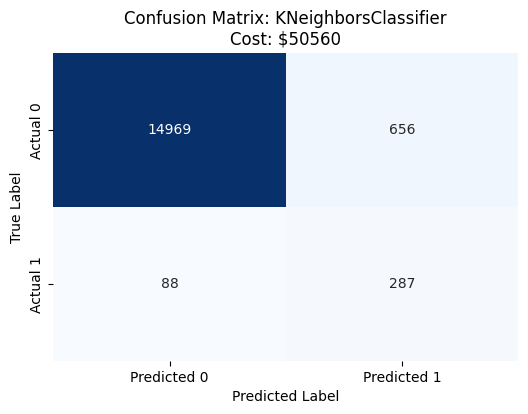


--- Classification Report (KNeighborsClassifier) ---
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     15625
           1       0.30      0.77      0.44       375

    accuracy                           0.95     16000
   macro avg       0.65      0.86      0.71     16000
weighted avg       0.98      0.95      0.96     16000

==================== XGBClassifier ====================


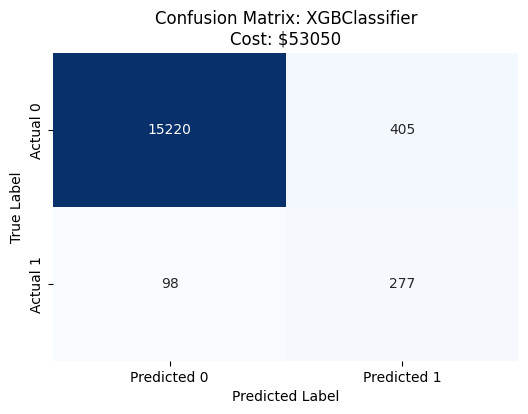


--- Classification Report (XGBClassifier) ---
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     15625
           1       0.41      0.74      0.52       375

    accuracy                           0.97     16000
   macro avg       0.70      0.86      0.75     16000
weighted avg       0.98      0.97      0.97     16000

==================== CatBoostClassifier ====================


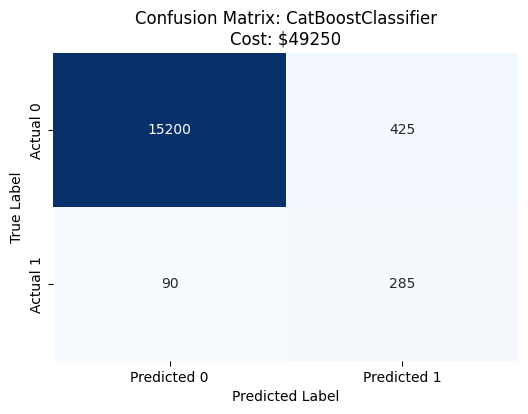


--- Classification Report (CatBoostClassifier) ---
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     15625
           1       0.40      0.76      0.53       375

    accuracy                           0.97     16000
   macro avg       0.70      0.87      0.75     16000
weighted avg       0.98      0.97      0.97     16000

==================== AdaBoostClassifier ====================


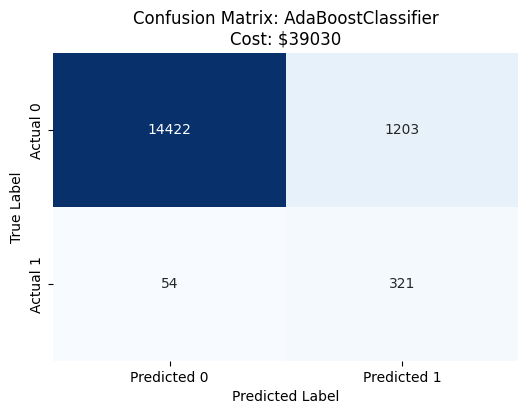


--- Classification Report (AdaBoostClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     15625
           1       0.21      0.86      0.34       375

    accuracy                           0.92     16000
   macro avg       0.60      0.89      0.65     16000
weighted avg       0.98      0.92      0.94     16000



In [57]:
report_pca_smt = evaluate_models_detailed(X_train_smt, X_test_reduced, y_train_smt, y_test, models)

==================== RandomForestClassifier ====================


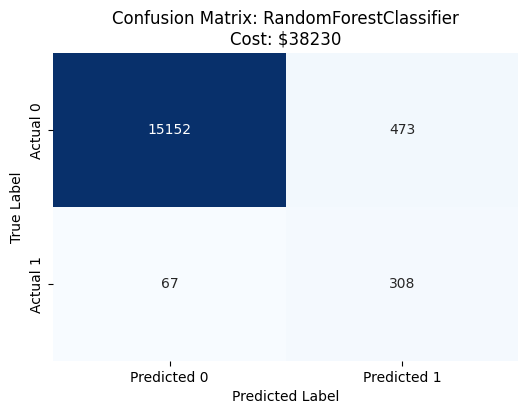


--- Classification Report (RandomForestClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     15625
           1       0.39      0.82      0.53       375

    accuracy                           0.97     16000
   macro avg       0.69      0.90      0.76     16000
weighted avg       0.98      0.97      0.97     16000

==================== DecisionTreeClassifier ====================


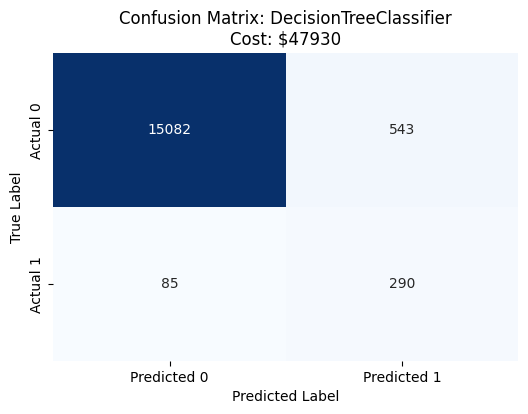


--- Classification Report (DecisionTreeClassifier) ---
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     15625
           1       0.35      0.77      0.48       375

    accuracy                           0.96     16000
   macro avg       0.67      0.87      0.73     16000
weighted avg       0.98      0.96      0.97     16000

==================== GradientBoostingClassifier ====================


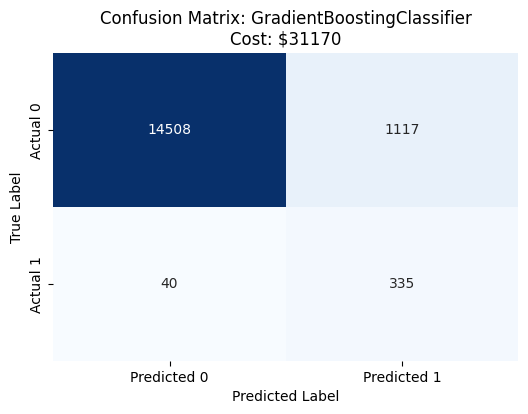


--- Classification Report (GradientBoostingClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     15625
           1       0.23      0.89      0.37       375

    accuracy                           0.93     16000
   macro avg       0.61      0.91      0.66     16000
weighted avg       0.98      0.93      0.95     16000

==================== LogisticRegression ====================


c:\CS\kish naik\APS_sensor_fault_detection\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


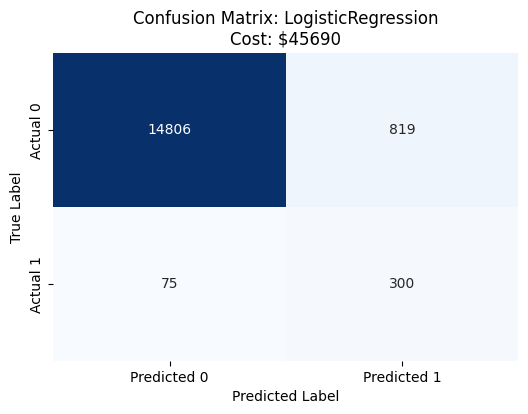


--- Classification Report (LogisticRegression) ---
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     15625
           1       0.27      0.80      0.40       375

    accuracy                           0.94     16000
   macro avg       0.63      0.87      0.69     16000
weighted avg       0.98      0.94      0.96     16000

==================== KNeighborsClassifier ====================


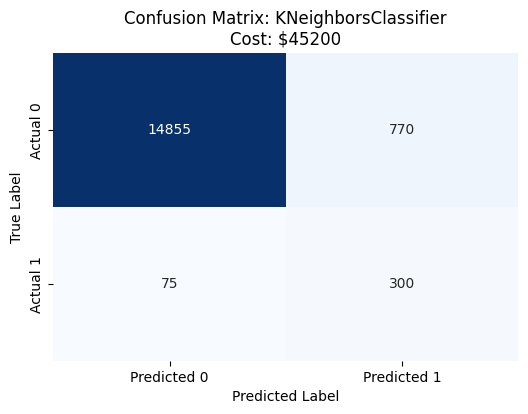


--- Classification Report (KNeighborsClassifier) ---
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     15625
           1       0.28      0.80      0.42       375

    accuracy                           0.95     16000
   macro avg       0.64      0.88      0.69     16000
weighted avg       0.98      0.95      0.96     16000

==================== XGBClassifier ====================


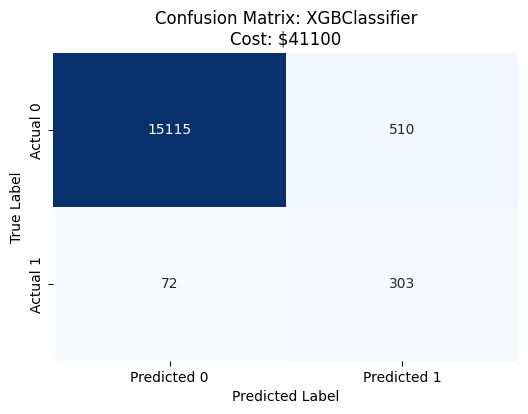


--- Classification Report (XGBClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     15625
           1       0.37      0.81      0.51       375

    accuracy                           0.96     16000
   macro avg       0.68      0.89      0.75     16000
weighted avg       0.98      0.96      0.97     16000

==================== CatBoostClassifier ====================


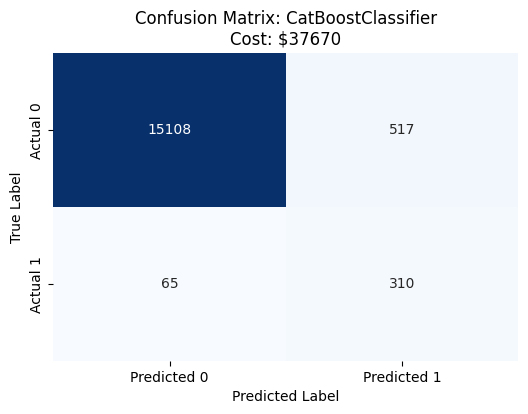


--- Classification Report (CatBoostClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     15625
           1       0.37      0.83      0.52       375

    accuracy                           0.96     16000
   macro avg       0.69      0.90      0.75     16000
weighted avg       0.98      0.96      0.97     16000

==================== AdaBoostClassifier ====================


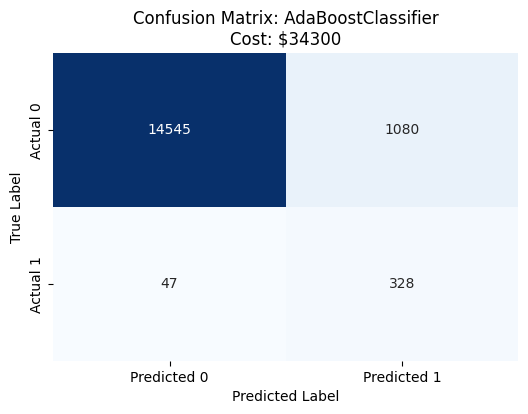


--- Classification Report (AdaBoostClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     15625
           1       0.23      0.87      0.37       375

    accuracy                           0.93     16000
   macro avg       0.61      0.90      0.67     16000
weighted avg       0.98      0.93      0.95     16000



In [58]:
report_pca_smte = evaluate_models_detailed(X_train_smte, X_test_reduced, y_train_smte, y_test, models)

In [59]:
report_pca_smt

Model   Cost  Accuracy  F1 Score  Precision    Recall  \
2  GradientBoostingClassifier  30320  0.933000  0.384615   0.245062  0.893333   
7          AdaBoostClassifier  39030  0.921438  0.338073   0.210630  0.856000   
3          LogisticRegression  45430  0.936562  0.373843   0.243178  0.808000   
6          CatBoostClassifier  49250  0.967812  0.525346   0.401408  0.760000   
4        KNeighborsClassifier  50560  0.953500  0.435508   0.304348  0.765333   
5               XGBClassifier  53050  0.968562  0.524125   0.406158  0.738667   
0      RandomForestClassifier  54360  0.978750  0.614512   0.534517  0.722667   
1      DecisionTreeClassifier  68160  0.969063  0.498480   0.401961  0.656000   

        MCC   ROC AUC  
2  0.447744  0.973009  
7  0.401468  0.963900  
3  0.422094  0.950352  
6  0.538367  0.967484  
4  0.464674  0.898653  
5  0.533787  0.962779  
0  0.611109  0.968226  
1  0.498967  0.812590

In [60]:
report_pca_smte

Model   Cost  Accuracy  F1 Score  Precision    Recall  \
2  GradientBoostingClassifier  31170  0.927687  0.366721   0.230716  0.893333   
7          AdaBoostClassifier  34300  0.929562  0.367919   0.232955  0.874667   
6          CatBoostClassifier  37670  0.963625  0.515807   0.374849  0.826667   
0      RandomForestClassifier  38230  0.966250  0.532872   0.394366  0.821333   
5               XGBClassifier  41100  0.963625  0.510101   0.372694  0.808000   
4        KNeighborsClassifier  45200  0.947187  0.415225   0.280374  0.800000   
3          LogisticRegression  45690  0.944125  0.401606   0.268097  0.800000   
1      DecisionTreeClassifier  47930  0.960750  0.480132   0.348139  0.773333   

        MCC   ROC AUC  
2  0.432843  0.967946  
7  0.430187  0.962869  
6  0.542284  0.972218  
0  0.555415  0.963634  
5  0.534131  0.971820  
4  0.454655  0.907608  
3  0.443460  0.944168  
1  0.502981  0.869291

#### Hyperparameter tuning 

In [52]:
from hyperopt import hp, STATUS_OK, Trials, fmin, tpe
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy.stats import randint, uniform, loguniform
from sklearn.model_selection import RandomizedSearchCV

c:\CS\kish naik\APS_sensor_fault_detection\.venv\Lib\site-packages\hyperopt\atpe.py:19: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [53]:
count_class_0 = len(y_train[y_train == 0])
count_class_1 = len(y_train[y_train == 1])
scale_ratio = count_class_0 / count_class_1
scale_ratio

59.0

In [54]:
def scania_cost(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost_1 = 10   # Cost of unnecessary check
    cost_2 = 500  # Cost of missing a failure
    return (cost_1 * fp) + (cost_2 * fn)


# Create a scorer object. 
# greater_is_better=False means sklearn will return NEGATIVE cost (e.g., -25000)
# to indicate that "higher" (closer to 0) is better.
cost_scorer = make_scorer(scania_cost, greater_is_better=False)

# XGB

#### Mean imputation

In [64]:
# ==========================================
# 1. Define the Search Space
# ==========================================
# Note: scale_ratio must be defined (negatives/positives)
# Logic: 'hp.uniform' takes (label, min, max)
# Logic: 'hp.quniform' returns discrete steps (like integers) but as floats
xgb_space = {
    # Class Balance: range [0.5*ratio, 2.5*ratio]
    'scale_pos_weight': hp.uniform('scale_pos_weight', scale_ratio * 0.5, scale_ratio * 2.5),
    
    # Tree Structure: integers 3 to 9
    'max_depth': hp.quniform('max_depth', 3, 9, 1),
    
    # Learning Speed: log-uniform distribution
    'learning_rate': hp.loguniform('learning_rate', np.log(0.005), np.log(0.2)),
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 1),
    
    # Outlier Control
    'min_child_weight': hp.quniform('min_child_weight', 2, 10, 1),
    
    # Sampling
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
    
    # Regularization
    'gamma': hp.uniform('gamma', 0, 5),
    'reg_alpha': hp.uniform('reg_alpha', 0, 5),
    'reg_lambda': hp.uniform('reg_lambda', 0, 5),
    'max_delta_step': hp.quniform('max_delta_step', 0, 10, 1)
}

In [72]:
# ==========================================
# 2. Define the Objective Function
# ==========================================
def objective(params):
    # Hyperopt returns floats, so we must cast integer params
    params['max_depth'] = int(params['max_depth'])
    params['n_estimators'] = int(params['n_estimators'])
    params['min_child_weight'] = int(params['min_child_weight'])
    params['max_delta_step'] = int(params['max_delta_step'])
    
    # Initialize the model with current params
    clf = XGBClassifier(
        objective='binary:logistic',
        n_jobs=-1,
        random_state=42,
        **params
    )
    
    # CV Strategy
    cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    
    # Calculate Score
    score = cross_val_score(clf, X_train_mean, y_train, cv=cv_strategy, scoring=cost_scorer).mean()
    
    # Hyperopt minimizes "loss", so we return Negative Score
    return {'loss': -score, 'status': STATUS_OK}

In [73]:
# ==========================================
# 3. Run Optimization
# ==========================================
print("Starting Bayesian Optimization...")
trials = Trials()

best = fmin(
    fn=objective,
    space=xgb_space,
    algo=tpe.suggest, # Tree-structured Parzen Estimator (the Bayesian part)
    max_evals=50,     # Equivalent to n_iter
    trials=trials,
    rstate=np.random.default_rng(42) # Reproducibility
)

Starting Bayesian Optimization...
100%|██████████| 50/50 [13:34<00:00, 16.28s/trial, best loss: 14103.333333333334]


In [74]:
# ==========================================
# 4. Extract Best Parameters
# ==========================================
# fmin returns floats for quniform, so cast them back to int for the final model
best_params = best.copy()
best_params['max_depth'] = int(best_params['max_depth'])
best_params['n_estimators'] = int(best_params['n_estimators'])
best_params['min_child_weight'] = int(best_params['min_child_weight'])
best_params['max_delta_step'] = int(best_params['max_delta_step'])

best_loss = min([t['result']['loss'] for t in trials.trials])

print(f"Best Score (cost): {best_loss:.4f}")
print(f"\nBest Parameters: {best_params}")

Best Score (cost): 14103.3333

Best Parameters: {'colsample_bytree': np.float64(0.5361276532890608), 'gamma': np.float64(2.1761605463873), 'learning_rate': np.float64(0.02141508268781027), 'max_delta_step': 3, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 540, 'reg_alpha': np.float64(2.420248057534488), 'reg_lambda': np.float64(4.092825174288395), 'scale_pos_weight': np.float64(132.90837699554075), 'subsample': np.float64(0.7744511208700258)}


In [75]:
xgb_cost = {'XGBClassifier': XGBClassifier(
    colsample_bytree=0.5361276532890608,
    gamma=2.1761605463873,
    learning_rate=0.02141508268781027,
    max_delta_step=3,
    max_depth=3,
    min_child_weight=4,
    n_estimators=540,
    reg_alpha=2.420248057534488,
    reg_lambda=4.092825174288395,
    scale_pos_weight=132.90837699554075,
    subsample=0.7744511208700258
)}

==================== XGBClassifier ====================


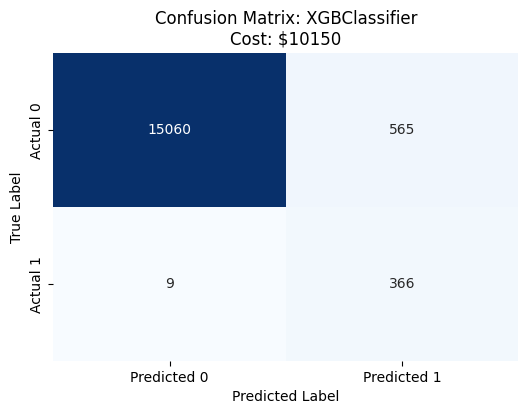


--- Classification Report (XGBClassifier) ---
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15625
           1       0.39      0.98      0.56       375

    accuracy                           0.96     16000
   macro avg       0.70      0.97      0.77     16000
weighted avg       0.99      0.96      0.97     16000



In [76]:
report_xgb_cost = evaluate_models_detailed(X_train_mean, X_test_mean, y_train, y_test, xgb_cost)

In [77]:
report_xgb_cost

Model   Cost  Accuracy  F1 Score  Precision  Recall       MCC  \
0  XGBClassifier  10150  0.964125   0.56049   0.393126   0.976  0.607383   

    ROC AUC  
0  0.994596

#### Bayesian Optimization minimizing cost

#### Decision tree classifier

#### 4. Looking at the distribution of the target variable

#### 5. Basic data exploration

#### 6. Rejecting useless columns

#### 7. Visual EDA for data distribution

#### 8. Feature selection based on data distribution

#### 9. Handling outliers

#### 10. Handling missing values

#### 11. Visual correlation analysis

#### 12. Statistical correlation analysis (feature selection)

#### 13. Converting data to numeric values for ML 

#### 14. Sampling and K-fold cross validation

#### 15. Experimenting with multiple algorithms

#### 16. Selecting the best model

#### 17. Deploying the best model into production